**Metadata**

The attributes are :
1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)


In [34]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as ks

In [35]:
#loading the dataset
df1=pd.read_csv("/content/bodyfat.csv")

In [36]:
df1.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [37]:
df2=df1.reindex(columns= ['Density', 'Age', 'Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Biceps','Forearm','Wrist','BodyFat'])
print(df2)

     Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  BodyFat  
0    

In [38]:
df2.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


In [39]:
df2.shape

(252, 15)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  BodyFat  252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [41]:
df2.describe()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,0.019031,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740
min,0.995000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,1.041400,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000
50%,1.054900,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000
75%,1.070400,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000
max,1.108900,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


In [42]:
df2.isnull().sum()

Density    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
BodyFat    0
dtype: int64

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [44]:
np_array = df2.to_numpy()

In [45]:
# split into input (X) and output (Y) variables
X = np_array[:,0:14]
Y = np_array[:,14]

In [46]:
seed=42
np.random.seed(seed)

In [47]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.85)

In [48]:
#Before training the model we need to perform scaling on the dataset 
#The idea behind StandardScaler is that it will transform the data such that its distribution 
#will have a mean value 0 and standard deviation of 1. 
from sklearn.preprocessing import StandardScaler

#For this purpose we have choosen StandardScaler from sklearn
scaler = StandardScaler()

# Fitting to the training data
scaler.fit(X_train)


StandardScaler()

In [49]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [51]:
scaler.fit(y_train)

StandardScaler()

In [52]:
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [53]:
X_train.shape

(214, 14)

Q1: Perform experiments using (70,15,15) split and tabulate the performance in terms of RMSE 
for the following Hyper parameters : 

Q2:Visualize the training and validation loss against the epochs and comment on optimal 
hyperparameters

**ONE HIDDEN LAYER**

In [54]:
rmse_list=[1000]

In [55]:
def model_one_hidden_layer(fn,ep,lr,reg):
  model1=Sequential()
  if reg=="L1":
    model1.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model1.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model1.add(tf.keras.layers.Dense(10,activation='linear',activity_regularizer=tf.keras.regularizers.L1(0.01),name="outputLayer"))
  elif(reg=="L2"):
    model1.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model1.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model1.add(tf.keras.layers.Dense(10,activation='linear',activity_regularizer=tf.keras.regularizers.L2(0.01),name="outputLayer"))    
  elif(reg=="No"):
    model1.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model1.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model1.add(tf.keras.layers.Dense(10,activation='linear',name="outputLayer"))    

  opt=tf.keras.optimizers.Adam(learning_rate=lr)
  model1.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
  history_m1=model1.fit(X_train,y_train,validation_data=(X_train,y_train), epochs=ep, batch_size=10)

  rmse=model1.evaluate(X_test,y_test,verbose=False)[1]
  if rmse<=min(rmse_list):
    print("for hyperparameters \n ","Activation:",fn,"Regularization :",reg,"Learning rate :",lr ,"and no of epochs :",ep)
    print("rmse score is :",rmse)
    print("---------------------------------------------------------------------")
  rmse_list.append(rmse)

  loss=history_m1.history['loss']
  val_loss=history_m1.history['val_loss']
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Training and validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()


Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 507.2179 - root_mean_squared_error: 22.4870 - val_loss: 56.8117 - val_root_mean_squared_error: 7.4986
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 56.0755 - root_mean_squared_error: 7.4507 - val_loss: 23.6871 - val_root_mean_squared_error: 4.8296
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 13.9486 - root_mean_squared_error: 3.6976 - val_loss: 4.4739 - val_root_mean_squared_error: 2.0768
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 4.3890 - root_mean_squared_error: 2.0607 - val_loss: 3.4466 - val_root_mean_squared_error: 1.8179
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 2.2071 - root_mean_squared_error: 1.4450 - val_loss: 2.0658 - val_root_mean_squared_error: 1.4020
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 1.3942 - root_mean_squared_error: 1.1376 - val_loss: 0.7201 - val_root

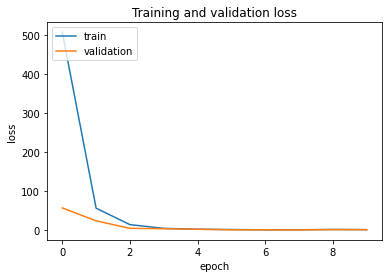

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 579.6199 - root_mean_squared_error: 22.9551 - val_loss: 25.6357 - val_root_mean_squared_error: 4.8216
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 30.6107 - root_mean_squared_error: 5.2702 - val_loss: 14.0377 - val_root_mean_squared_error: 3.5691
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 11.3688 - root_mean_squared_error: 3.2108 - val_loss: 3.2033 - val_root_mean_squared_error: 1.6932
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 2.8359 - root_mean_squared_error: 1.5861 - val_loss: 1.3548 - val_root_mean_squared_error: 1.0925
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.9760 - root_mean_squared_error: 0.9181 - val_loss: 0.6204 - val_root_mean_squared_error: 0.6984
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.7032 - root_mean_squared_error: 0.7675 - val_loss: 0.5841 - val_root

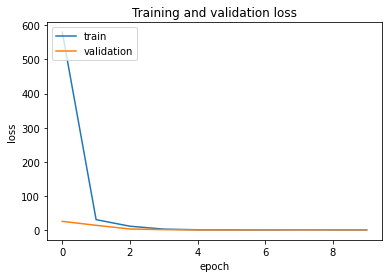

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 53.8192 - root_mean_squared_error: 7.3011 - val_loss: 13.0364 - val_root_mean_squared_error: 3.5661
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 3.3064 - root_mean_squared_error: 1.7776 - val_loss: 0.6759 - val_root_mean_squared_error: 0.7596
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.8495 - root_mean_squared_error: 0.8732 - val_loss: 0.5162 - val_root_mean_squared_error: 0.6633
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3663 - root_mean_squared_error: 0.5364 - val_loss: 0.3831 - val_root_mean_squared_error: 0.5596
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3516 - root_mean_squared_error: 0.5241 - val_loss: 0.4170 - val_root_mean_squared_error: 0.5614
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3021 - root_mean_squared_error: 0.4751 - val_loss: 0.2909 - val_root_mean

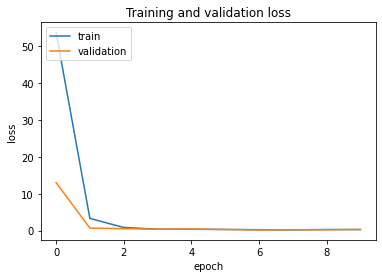

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 41.5019 - root_mean_squared_error: 6.1402 - val_loss: 4.2795 - val_root_mean_squared_error: 1.9862
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 1.8019 - root_mean_squared_error: 1.2630 - val_loss: 1.1942 - val_root_mean_squared_error: 1.0107
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 1.1252 - root_mean_squared_error: 0.9922 - val_loss: 0.6726 - val_root_mean_squared_error: 0.7496
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4674 - root_mean_squared_error: 0.6125 - val_loss: 0.5752 - val_root_mean_squared_error: 0.6593
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3859 - root_mean_squared_error: 0.5398 - val_loss: 0.4058 - val_root_mean_squared_error: 0.5877
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4355 - root_mean_squared_error: 0.5857 - val_loss: 0.3455 - val_root_mean_

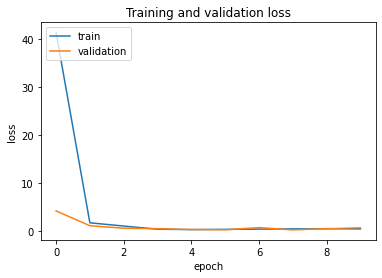

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 5.9627 - root_mean_squared_error: 2.4041 - val_loss: 1.1198 - val_root_mean_squared_error: 1.0118
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4864 - root_mean_squared_error: 0.6304 - val_loss: 0.2403 - val_root_mean_squared_error: 0.3970
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1810 - root_mean_squared_error: 0.3229 - val_loss: 0.1834 - val_root_mean_squared_error: 0.3024
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1599 - root_mean_squared_error: 0.2820 - val_loss: 0.1271 - val_root_mean_squared_error: 0.2335
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1274 - root_mean_squared_error: 0.2163 - val_loss: 0.1154 - val_root_mean_squared_error: 0.1820
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1158 - root_mean_squared_error: 0.1902 - val_loss: 0.1087 - val_root_mean_s

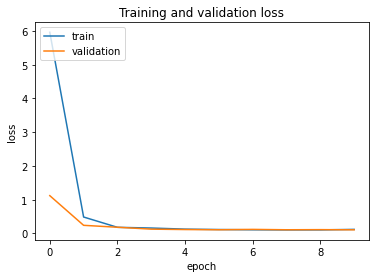

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 4.4207 - root_mean_squared_error: 2.0008 - val_loss: 0.9854 - val_root_mean_squared_error: 0.9156
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5227 - root_mean_squared_error: 0.6454 - val_loss: 0.2664 - val_root_mean_squared_error: 0.4391
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.2011 - root_mean_squared_error: 0.3452 - val_loss: 0.1670 - val_root_mean_squared_error: 0.2950
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1562 - root_mean_squared_error: 0.2709 - val_loss: 0.1270 - val_root_mean_squared_error: 0.2279
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1249 - root_mean_squared_error: 0.2123 - val_loss: 0.1204 - val_root_mean_squared_error: 0.1948
Epoch 6/10
22/22 [==============================] - 0s 10ms/step - loss: 0.1175 - root_mean_squared_error: 0.1895 - val_loss: 0.1159 - val_root_mean_

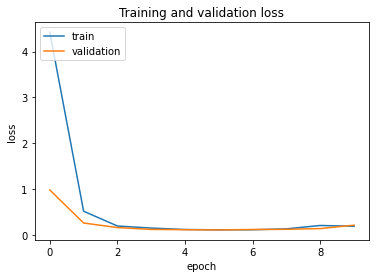

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 0.7587 - root_mean_squared_error: 0.8360 - val_loss: 0.4595 - val_root_mean_squared_error: 0.6208
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.2938 - root_mean_squared_error: 0.4755 - val_loss: 0.2133 - val_root_mean_squared_error: 0.3690
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1680 - root_mean_squared_error: 0.2992 - val_loss: 0.1371 - val_root_mean_squared_error: 0.2485
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1400 - root_mean_squared_error: 0.2527 - val_loss: 0.1254 - val_root_mean_squared_error: 0.2344
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1162 - root_mean_squared_error: 0.1942 - val_loss: 0.1099 - val_root_mean_squared_error: 0.1763
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1126 - root_mean_squared_error: 0.1780 - val_loss: 0.1175 - val_root_mean_s

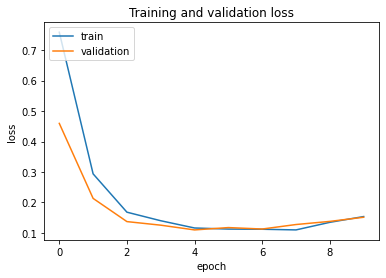

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.6976 - root_mean_squared_error: 0.8036 - val_loss: 0.3481 - val_root_mean_squared_error: 0.5331
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.2489 - root_mean_squared_error: 0.4293 - val_loss: 0.1773 - val_root_mean_squared_error: 0.3173
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1770 - root_mean_squared_error: 0.3206 - val_loss: 0.1408 - val_root_mean_squared_error: 0.2429
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1333 - root_mean_squared_error: 0.2289 - val_loss: 0.1207 - val_root_mean_squared_error: 0.2067
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1247 - root_mean_squared_error: 0.2170 - val_loss: 0.1197 - val_root_mean_squared_error: 0.1820
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1373 - root_mean_squared_error: 0.2339 - val_loss: 0.1156 - val_root_mean_s

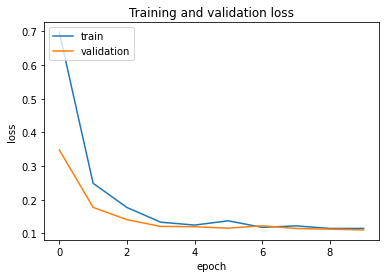

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 0.8171 - root_mean_squared_error: 0.8585 - val_loss: 0.3308 - val_root_mean_squared_error: 0.5027
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2537 - root_mean_squared_error: 0.4120 - val_loss: 0.2427 - val_root_mean_squared_error: 0.4124
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1993 - root_mean_squared_error: 0.3432 - val_loss: 0.1481 - val_root_mean_squared_error: 0.2789
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1441 - root_mean_squared_error: 0.2573 - val_loss: 0.1230 - val_root_mean_squared_error: 0.1862
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1316 - root_mean_squared_error: 0.2259 - val_loss: 0.1228 - val_root_mean_squared_error: 0.2011
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1286 - root_mean_squared_error: 0.2195 - val_loss: 0.1220 - val_root_mean_s

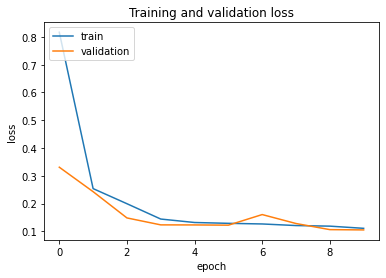

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.7568 - root_mean_squared_error: 0.8190 - val_loss: 0.3462 - val_root_mean_squared_error: 0.4979
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2469 - root_mean_squared_error: 0.4003 - val_loss: 0.1866 - val_root_mean_squared_error: 0.2916
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1996 - root_mean_squared_error: 0.3405 - val_loss: 0.1357 - val_root_mean_squared_error: 0.2609
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1412 - root_mean_squared_error: 0.2449 - val_loss: 0.1354 - val_root_mean_squared_error: 0.2240
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1287 - root_mean_squared_error: 0.2212 - val_loss: 0.1182 - val_root_mean_squared_error: 0.1970
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.1227 - root_mean_squared_error: 0.1973 - val_loss: 0.1348 - val_root_mean_s

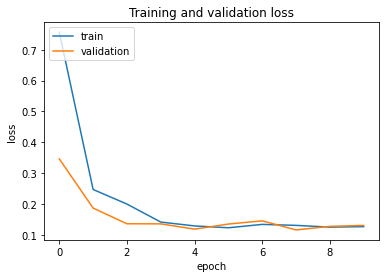

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 1.1254 - root_mean_squared_error: 1.0455 - val_loss: 0.8172 - val_root_mean_squared_error: 0.8944
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.7523 - root_mean_squared_error: 0.8545 - val_loss: 0.6638 - val_root_mean_squared_error: 0.7978
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6217 - root_mean_squared_error: 0.7677 - val_loss: 0.5501 - val_root_mean_squared_error: 0.7155
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5207 - root_mean_squared_error: 0.6917 - val_loss: 0.4748 - val_root_mean_squared_error: 0.6541
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4549 - root_mean_squared_error: 0.6367 - val_loss: 0.4221 - val_root_mean_squared_error: 0.6083
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4007 - root_mean_squared_error: 0.5891 - val_loss: 0.3777 - val_root_mean_s

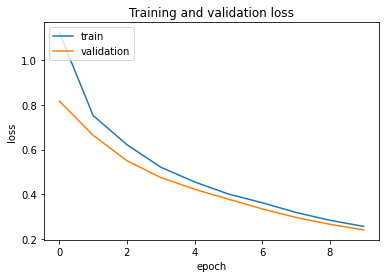

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 0.9204 - root_mean_squared_error: 0.9535 - val_loss: 0.7258 - val_root_mean_squared_error: 0.8468
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6563 - root_mean_squared_error: 0.8021 - val_loss: 0.5592 - val_root_mean_squared_error: 0.7351
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5157 - root_mean_squared_error: 0.7008 - val_loss: 0.4748 - val_root_mean_squared_error: 0.6673
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4503 - root_mean_squared_error: 0.6450 - val_loss: 0.4152 - val_root_mean_squared_error: 0.6130
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4007 - root_mean_squared_error: 0.5986 - val_loss: 0.3729 - val_root_mean_squared_error: 0.5738
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3497 - root_mean_squared_error: 0.5518 - val_loss: 0.3284 - val_root_mean_s

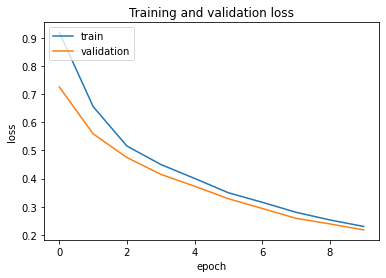

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 1.7407 - root_mean_squared_error: 1.2962 - val_loss: 1.6396 - val_root_mean_squared_error: 1.2587
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 1.5650 - root_mean_squared_error: 1.2303 - val_loss: 1.4854 - val_root_mean_squared_error: 1.1992
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 1.4228 - root_mean_squared_error: 1.1740 - val_loss: 1.3588 - val_root_mean_squared_error: 1.1478
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 1.3070 - root_mean_squared_error: 1.1259 - val_loss: 1.2502 - val_root_mean_squared_error: 1.1014
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 1.2107 - root_mean_squared_error: 1.0841 - val_loss: 1.1611 - val_root_mean_squared_error: 1.0618
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 1.1279 - root_mean_squared_error: 1.0465 - val_loss: 1.0895 - val_root_mean_s

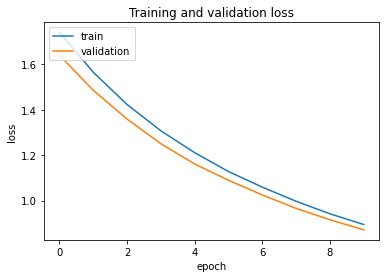

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 1.3679 - root_mean_squared_error: 1.1527 - val_loss: 1.2820 - val_root_mean_squared_error: 1.1176
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 1.2201 - root_mean_squared_error: 1.0916 - val_loss: 1.1565 - val_root_mean_squared_error: 1.0642
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 1.1089 - root_mean_squared_error: 1.0431 - val_loss: 1.0583 - val_root_mean_squared_error: 1.0201
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 1.0223 - root_mean_squared_error: 1.0033 - val_loss: 0.9823 - val_root_mean_squared_error: 0.9843
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 0.9548 - root_mean_squared_error: 0.9709 - val_loss: 0.9234 - val_root_mean_squared_error: 0.9553
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 0.9002 - root_mean_squared_error: 0.9436 - val_loss: 0.8738 - val_root_mean_s

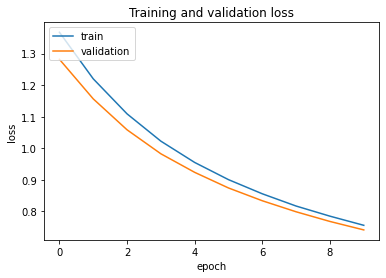

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 1.5705 - root_mean_squared_error: 1.2308 - val_loss: 1.5610 - val_root_mean_squared_error: 1.2271
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 1.5532 - root_mean_squared_error: 1.2241 - val_loss: 1.5442 - val_root_mean_squared_error: 1.2206
Epoch 3/10
22/22 [==============================] - 0s 5ms/step - loss: 1.5366 - root_mean_squared_error: 1.2176 - val_loss: 1.5277 - val_root_mean_squared_error: 1.2141
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 1.5202 - root_mean_squared_error: 1.2112 - val_loss: 1.5115 - val_root_mean_squared_error: 1.2078
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 1.5041 - root_mean_squared_error: 1.2049 - val_loss: 1.4956 - val_root_mean_squared_error: 1.2015
Epoch 6/10
22/22 [==============================] - 0s 5ms/step - loss: 1.4884 - root_mean_squared_error: 1.1986 - val_loss: 1.4799 - val_root_mean_s

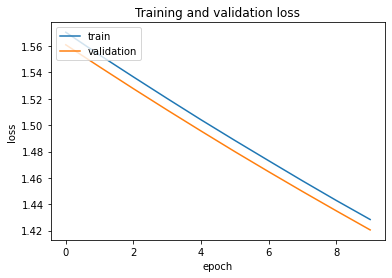

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 1.1174 - root_mean_squared_error: 1.0507 - val_loss: 1.1127 - val_root_mean_squared_error: 1.0486
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 1.1086 - root_mean_squared_error: 1.0467 - val_loss: 1.1042 - val_root_mean_squared_error: 1.0447
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1002 - root_mean_squared_error: 1.0430 - val_loss: 1.0959 - val_root_mean_squared_error: 1.0410
Epoch 4/10
22/22 [==============================] - 0s 5ms/step - loss: 1.0921 - root_mean_squared_error: 1.0393 - val_loss: 1.0879 - val_root_mean_squared_error: 1.0374
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0844 - root_mean_squared_error: 1.0358 - val_loss: 1.0797 - val_root_mean_squared_error: 1.0337
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 1.0763 - root_mean_squared_error: 1.0321 - val_loss: 1.0723 - val_root_mean_s

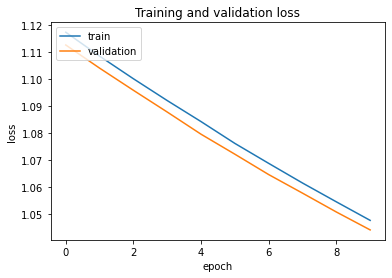

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 475.7850 - root_mean_squared_error: 21.7779 - val_loss: 57.7582 - val_root_mean_squared_error: 7.5586
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 48.5386 - root_mean_squared_error: 6.9275 - val_loss: 12.6420 - val_root_mean_squared_error: 3.5149
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 14.9711 - root_mean_squared_error: 3.8307 - val_loss: 4.6894 - val_root_mean_squared_error: 2.1234
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 2.5266 - root_mean_squared_error: 1.5462 - val_loss: 1.3103 - val_root_mean_squared_error: 1.0999
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 1.4599 - root_mean_squared_error: 1.1616 - val_loss: 1.0770 - val_root_mean_squared_error: 0.9929
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 1.0431 - root_mean_squared_error: 0.9708 - val_loss: 0.9397 - val_root

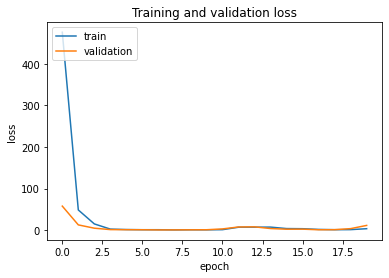

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 678.2310 - root_mean_squared_error: 24.8326 - val_loss: 202.6094 - val_root_mean_squared_error: 13.5471
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 51.8452 - root_mean_squared_error: 6.8617 - val_loss: 3.7620 - val_root_mean_squared_error: 1.8365
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 14.7669 - root_mean_squared_error: 3.6500 - val_loss: 5.3540 - val_root_mean_squared_error: 2.2056
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 3.2586 - root_mean_squared_error: 1.7108 - val_loss: 1.6810 - val_root_mean_squared_error: 1.2355
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 1.1233 - root_mean_squared_error: 0.9896 - val_loss: 0.6472 - val_root_mean_squared_error: 0.7272
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.6196 - root_mean_squared_error: 0.7157 - val_loss: 0.4114 - val_roo

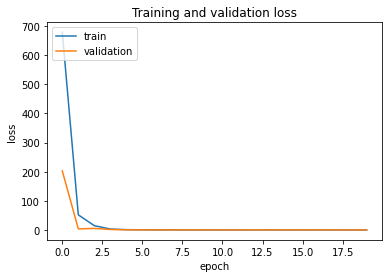

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 48.0531 - root_mean_squared_error: 6.8979 - val_loss: 6.0177 - val_root_mean_squared_error: 2.4100
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 4.5832 - root_mean_squared_error: 2.1029 - val_loss: 0.7758 - val_root_mean_squared_error: 0.8381
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.9332 - root_mean_squared_error: 0.9223 - val_loss: 0.4445 - val_root_mean_squared_error: 0.6065
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.3697 - root_mean_squared_error: 0.5443 - val_loss: 0.2536 - val_root_mean_squared_error: 0.4299
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.2887 - root_mean_squared_error: 0.4639 - val_loss: 0.2051 - val_root_mean_squared_error: 0.3576
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.2020 - root_mean_squared_error: 0.3595 - val_loss: 0.2064 - val_root_mean_

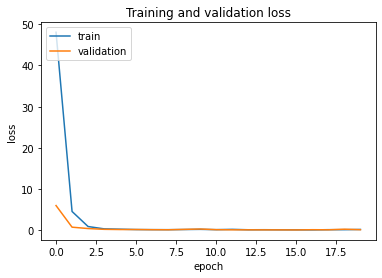

Epoch 1/20
22/22 [==============================] - 1s 10ms/step - loss: 51.7356 - root_mean_squared_error: 6.8560 - val_loss: 17.8349 - val_root_mean_squared_error: 4.0031
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 6.1910 - root_mean_squared_error: 2.3713 - val_loss: 2.4821 - val_root_mean_squared_error: 1.5062
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 1.7527 - root_mean_squared_error: 1.2601 - val_loss: 0.8185 - val_root_mean_squared_error: 0.8129
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5572 - root_mean_squared_error: 0.6847 - val_loss: 0.4472 - val_root_mean_squared_error: 0.6167
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.4392 - root_mean_squared_error: 0.5943 - val_loss: 0.4615 - val_root_mean_squared_error: 0.6320
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.3039 - root_mean_squared_error: 0.4697 - val_loss: 0.2256 - val_root_mean

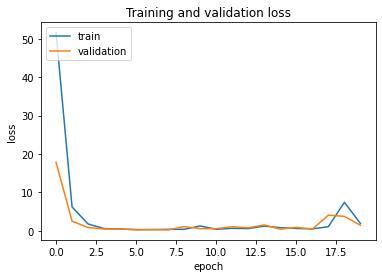

Epoch 1/20
22/22 [==============================] - 1s 19ms/step - loss: 5.9572 - root_mean_squared_error: 2.4020 - val_loss: 1.4498 - val_root_mean_squared_error: 1.1610
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 0.7361 - root_mean_squared_error: 0.8026 - val_loss: 0.2722 - val_root_mean_squared_error: 0.4286
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.2306 - root_mean_squared_error: 0.3866 - val_loss: 0.1668 - val_root_mean_squared_error: 0.3095
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1496 - root_mean_squared_error: 0.2653 - val_loss: 0.1230 - val_root_mean_squared_error: 0.2042
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1270 - root_mean_squared_error: 0.2176 - val_loss: 0.1178 - val_root_mean_squared_error: 0.1879
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1175 - root_mean_squared_error: 0.1981 - val_loss: 0.1079 - val_root_mean_s

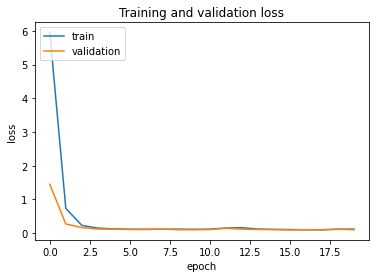

Epoch 1/20
22/22 [==============================] - 1s 10ms/step - loss: 5.4566 - root_mean_squared_error: 2.2251 - val_loss: 1.0593 - val_root_mean_squared_error: 0.9620
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.6458 - root_mean_squared_error: 0.7265 - val_loss: 0.2606 - val_root_mean_squared_error: 0.4176
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.2358 - root_mean_squared_error: 0.3949 - val_loss: 0.1714 - val_root_mean_squared_error: 0.2951
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1732 - root_mean_squared_error: 0.2950 - val_loss: 0.1514 - val_root_mean_squared_error: 0.2576
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1618 - root_mean_squared_error: 0.2833 - val_loss: 0.1530 - val_root_mean_squared_error: 0.2385
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1396 - root_mean_squared_error: 0.2505 - val_loss: 0.1254 - val_root_mean_s

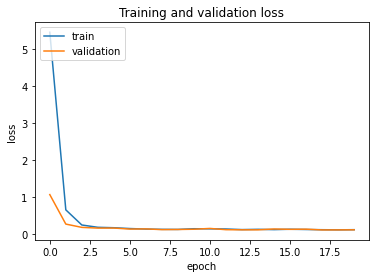

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 0.7006 - root_mean_squared_error: 0.7990 - val_loss: 0.4327 - val_root_mean_squared_error: 0.5990
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.3174 - root_mean_squared_error: 0.4945 - val_loss: 0.2445 - val_root_mean_squared_error: 0.4051
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1956 - root_mean_squared_error: 0.3423 - val_loss: 0.1480 - val_root_mean_squared_error: 0.2662
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1333 - root_mean_squared_error: 0.2375 - val_loss: 0.1188 - val_root_mean_squared_error: 0.2034
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1222 - root_mean_squared_error: 0.2074 - val_loss: 0.1194 - val_root_mean_squared_error: 0.1985
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1434 - root_mean_squared_error: 0.2518 - val_loss: 0.1685 - val_root_mean_s

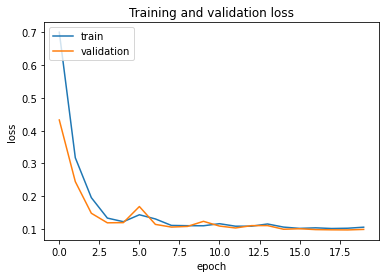

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 0.7056 - root_mean_squared_error: 0.8066 - val_loss: 0.4109 - val_root_mean_squared_error: 0.5917
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.2852 - root_mean_squared_error: 0.4713 - val_loss: 0.2100 - val_root_mean_squared_error: 0.3552
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1776 - root_mean_squared_error: 0.3206 - val_loss: 0.1478 - val_root_mean_squared_error: 0.2693
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1406 - root_mean_squared_error: 0.2567 - val_loss: 0.1357 - val_root_mean_squared_error: 0.2170
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1324 - root_mean_squared_error: 0.2330 - val_loss: 0.1270 - val_root_mean_squared_error: 0.1930
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1275 - root_mean_squared_error: 0.2089 - val_loss: 0.1264 - val_root_mean_s

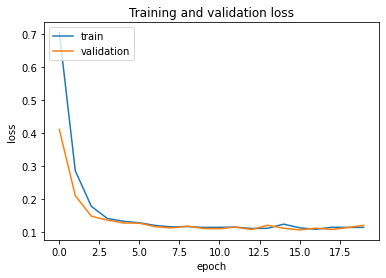

Epoch 1/20
22/22 [==============================] - 1s 24ms/step - loss: 0.8046 - root_mean_squared_error: 0.8476 - val_loss: 0.3438 - val_root_mean_squared_error: 0.5158
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 0.2720 - root_mean_squared_error: 0.4376 - val_loss: 0.1537 - val_root_mean_squared_error: 0.2741
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1570 - root_mean_squared_error: 0.2763 - val_loss: 0.1415 - val_root_mean_squared_error: 0.2251
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1420 - root_mean_squared_error: 0.2487 - val_loss: 0.1482 - val_root_mean_squared_error: 0.2731
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1263 - root_mean_squared_error: 0.2167 - val_loss: 0.1230 - val_root_mean_squared_error: 0.1829
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1256 - root_mean_squared_error: 0.2077 - val_loss: 0.1255 - val_root_mean_s

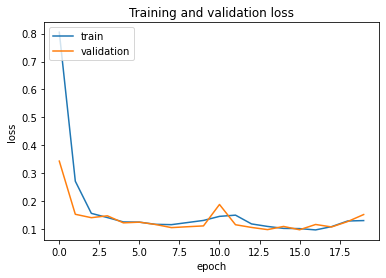

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 0.8593 - root_mean_squared_error: 0.8748 - val_loss: 0.5297 - val_root_mean_squared_error: 0.6503
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.3049 - root_mean_squared_error: 0.4644 - val_loss: 0.2187 - val_root_mean_squared_error: 0.3631
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1675 - root_mean_squared_error: 0.2908 - val_loss: 0.1554 - val_root_mean_squared_error: 0.2852
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1341 - root_mean_squared_error: 0.2309 - val_loss: 0.1437 - val_root_mean_squared_error: 0.2322
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1433 - root_mean_squared_error: 0.2444 - val_loss: 0.1869 - val_root_mean_squared_error: 0.2914
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.1453 - root_mean_squared_error: 0.2493 - val_loss: 0.1369 - val_root_mean_s

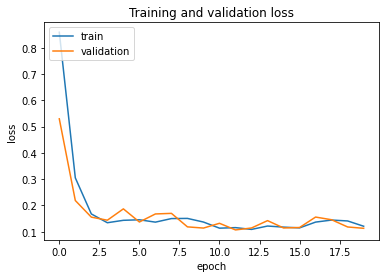

Epoch 1/20
22/22 [==============================] - 1s 10ms/step - loss: 1.1427 - root_mean_squared_error: 1.0539 - val_loss: 0.8101 - val_root_mean_squared_error: 0.8884
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 0.7237 - root_mean_squared_error: 0.8376 - val_loss: 0.6294 - val_root_mean_squared_error: 0.7751
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.5785 - root_mean_squared_error: 0.7379 - val_loss: 0.5237 - val_root_mean_squared_error: 0.6964
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.4924 - root_mean_squared_error: 0.6708 - val_loss: 0.4506 - val_root_mean_squared_error: 0.6346
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.4294 - root_mean_squared_error: 0.6157 - val_loss: 0.3957 - val_root_mean_squared_error: 0.5852
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.3762 - root_mean_squared_error: 0.5665 - val_loss: 0.3519 - val_root_mean_s

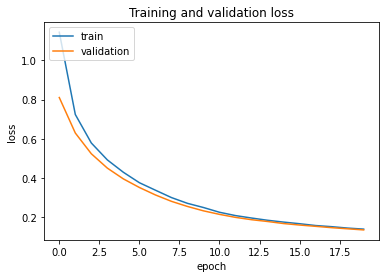

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 1.1863 - root_mean_squared_error: 1.0783 - val_loss: 0.8322 - val_root_mean_squared_error: 0.9091
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.7273 - root_mean_squared_error: 0.8489 - val_loss: 0.6267 - val_root_mean_squared_error: 0.7846
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 0.5628 - root_mean_squared_error: 0.7392 - val_loss: 0.5017 - val_root_mean_squared_error: 0.6926
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.4644 - root_mean_squared_error: 0.6612 - val_loss: 0.4290 - val_root_mean_squared_error: 0.6291
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.4134 - root_mean_squared_error: 0.6132 - val_loss: 0.3780 - val_root_mean_squared_error: 0.5800
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.3597 - root_mean_squared_error: 0.5623 - val_loss: 0.3336 - val_root_mean_s

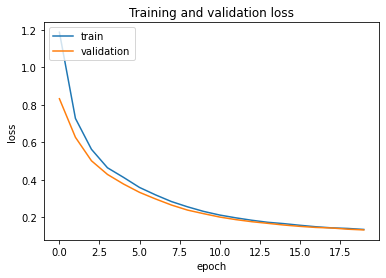

Epoch 1/20
22/22 [==============================] - 1s 10ms/step - loss: 1.4186 - root_mean_squared_error: 1.1679 - val_loss: 1.3271 - val_root_mean_squared_error: 1.1307
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 1.2622 - root_mean_squared_error: 1.1038 - val_loss: 1.1899 - val_root_mean_squared_error: 1.0730
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 1.1414 - root_mean_squared_error: 1.0519 - val_loss: 1.0915 - val_root_mean_squared_error: 1.0299
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 1.0554 - root_mean_squared_error: 1.0137 - val_loss: 1.0182 - val_root_mean_squared_error: 0.9968
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.9908 - root_mean_squared_error: 0.9842 - val_loss: 0.9605 - val_root_mean_squared_error: 0.9699
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.9398 - root_mean_squared_error: 0.9600 - val_loss: 0.9192 - val_root_mean_s

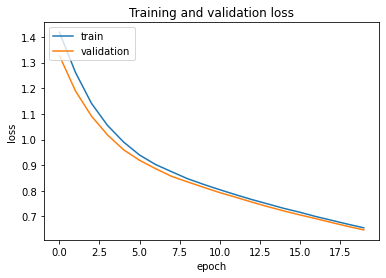

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 1.4198 - root_mean_squared_error: 1.1741 - val_loss: 1.3365 - val_root_mean_squared_error: 1.1408
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 1.2780 - root_mean_squared_error: 1.1167 - val_loss: 1.2155 - val_root_mean_squared_error: 1.0904
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 1.1704 - root_mean_squared_error: 1.0711 - val_loss: 1.1182 - val_root_mean_squared_error: 1.0480
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 1.0831 - root_mean_squared_error: 1.0322 - val_loss: 1.0426 - val_root_mean_squared_error: 1.0135
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 1.0137 - root_mean_squared_error: 0.9999 - val_loss: 0.9825 - val_root_mean_squared_error: 0.9851
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 0.9575 - root_mean_squared_error: 0.9729 - val_loss: 0.9311 - val_root_mean_s

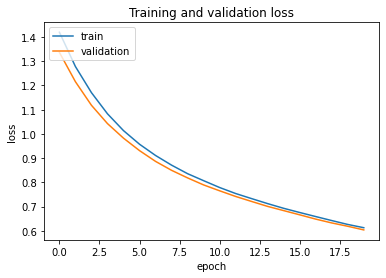

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 1.1220 - root_mean_squared_error: 1.0420 - val_loss: 1.1153 - val_root_mean_squared_error: 1.0391
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 1.1100 - root_mean_squared_error: 1.0367 - val_loss: 1.1038 - val_root_mean_squared_error: 1.0340
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 1.0986 - root_mean_squared_error: 1.0316 - val_loss: 1.0927 - val_root_mean_squared_error: 1.0290
Epoch 4/20
22/22 [==============================] - 0s 5ms/step - loss: 1.0876 - root_mean_squared_error: 1.0267 - val_loss: 1.0819 - val_root_mean_squared_error: 1.0241
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 1.0772 - root_mean_squared_error: 1.0220 - val_loss: 1.0718 - val_root_mean_squared_error: 1.0196
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 1.0672 - root_mean_squared_error: 1.0175 - val_loss: 1.0618 - val_root_mean_s

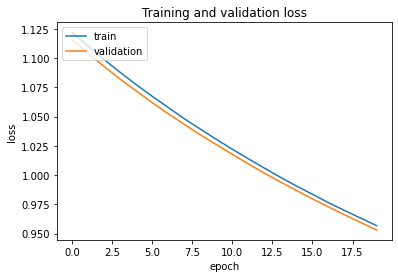

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 1.1461 - root_mean_squared_error: 1.0660 - val_loss: 1.1410 - val_root_mean_squared_error: 1.0637
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 1.1369 - root_mean_squared_error: 1.0619 - val_loss: 1.1324 - val_root_mean_squared_error: 1.0599
Epoch 3/20
22/22 [==============================] - 0s 5ms/step - loss: 1.1290 - root_mean_squared_error: 1.0584 - val_loss: 1.1243 - val_root_mean_squared_error: 1.0563
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 1.1209 - root_mean_squared_error: 1.0548 - val_loss: 1.1169 - val_root_mean_squared_error: 1.0530
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 1.1135 - root_mean_squared_error: 1.0515 - val_loss: 1.1094 - val_root_mean_squared_error: 1.0496
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 1.1063 - root_mean_squared_error: 1.0482 - val_loss: 1.1024 - val_root_mean_s

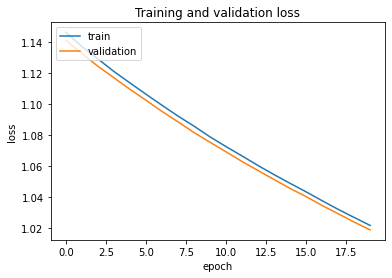

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 445.7215 - root_mean_squared_error: 21.0779 - val_loss: 30.6386 - val_root_mean_squared_error: 5.4986
Epoch 2/30
22/22 [==============================] - 0s 5ms/step - loss: 28.5998 - root_mean_squared_error: 5.3132 - val_loss: 6.5738 - val_root_mean_squared_error: 2.5256
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 7.8431 - root_mean_squared_error: 2.7657 - val_loss: 3.9349 - val_root_mean_squared_error: 1.9495
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 3.2045 - root_mean_squared_error: 1.7516 - val_loss: 1.6897 - val_root_mean_squared_error: 1.2538
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 1.4850 - root_mean_squared_error: 1.1741 - val_loss: 1.0956 - val_root_mean_squared_error: 0.9976
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 1.6718 - root_mean_squared_error: 1.2510 - val_loss: 0.8287 - val_root_m

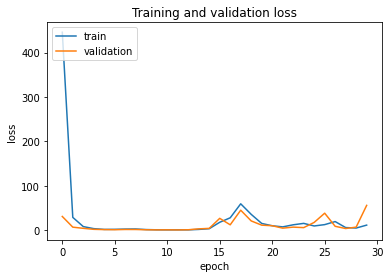

Epoch 1/30
22/22 [==============================] - 1s 26ms/step - loss: 607.6093 - root_mean_squared_error: 23.5023 - val_loss: 120.4572 - val_root_mean_squared_error: 10.4600
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 71.9529 - root_mean_squared_error: 8.0842 - val_loss: 40.3184 - val_root_mean_squared_error: 6.0584
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 18.3342 - root_mean_squared_error: 4.0796 - val_loss: 6.4267 - val_root_mean_squared_error: 2.4132
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 6.8762 - root_mean_squared_error: 2.4938 - val_loss: 3.8474 - val_root_mean_squared_error: 1.8559
Epoch 5/30
22/22 [==============================] - 0s 5ms/step - loss: 2.2140 - root_mean_squared_error: 1.4014 - val_loss: 2.8697 - val_root_mean_squared_error: 1.6081
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 1.8910 - root_mean_squared_error: 1.2919 - val_loss: 1.0506 - val_ro

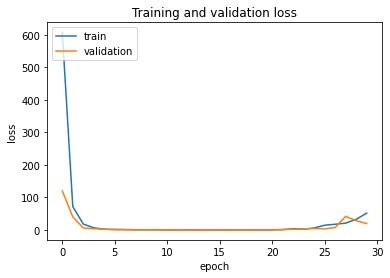

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 48.9011 - root_mean_squared_error: 6.9580 - val_loss: 5.2318 - val_root_mean_squared_error: 2.2499
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 3.6428 - root_mean_squared_error: 1.8722 - val_loss: 1.7742 - val_root_mean_squared_error: 1.2913
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 0.8145 - root_mean_squared_error: 0.8571 - val_loss: 0.4179 - val_root_mean_squared_error: 0.5967
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 0.3283 - root_mean_squared_error: 0.5032 - val_loss: 0.2390 - val_root_mean_squared_error: 0.4151
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 0.2311 - root_mean_squared_error: 0.3925 - val_loss: 0.2012 - val_root_mean_squared_error: 0.3561
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1818 - root_mean_squared_error: 0.3281 - val_loss: 0.2088 - val_root_mean_

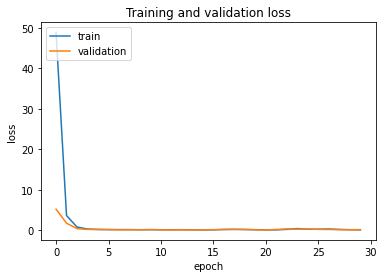

Epoch 1/30
22/22 [==============================] - 1s 10ms/step - loss: 45.2494 - root_mean_squared_error: 6.4142 - val_loss: 5.7437 - val_root_mean_squared_error: 2.3062
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 4.3538 - root_mean_squared_error: 1.9941 - val_loss: 1.8689 - val_root_mean_squared_error: 1.2793
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 1.2439 - root_mean_squared_error: 1.0480 - val_loss: 0.4560 - val_root_mean_squared_error: 0.6049
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 0.4190 - root_mean_squared_error: 0.5651 - val_loss: 0.4407 - val_root_mean_squared_error: 0.6226
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 0.3126 - root_mean_squared_error: 0.4828 - val_loss: 0.2356 - val_root_mean_squared_error: 0.3951
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2389 - root_mean_squared_error: 0.3892 - val_loss: 0.1784 - val_root_mean_

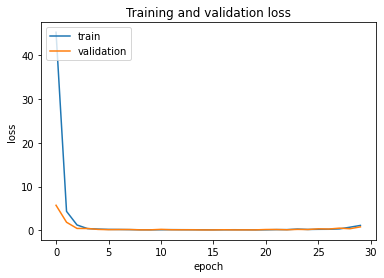

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 5.7677 - root_mean_squared_error: 2.3643 - val_loss: 1.3165 - val_root_mean_squared_error: 1.0947
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 0.5161 - root_mean_squared_error: 0.6549 - val_loss: 0.4097 - val_root_mean_squared_error: 0.5541
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 0.2986 - root_mean_squared_error: 0.4652 - val_loss: 0.1544 - val_root_mean_squared_error: 0.2757
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 0.2066 - root_mean_squared_error: 0.3529 - val_loss: 0.1341 - val_root_mean_squared_error: 0.2341
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1864 - root_mean_squared_error: 0.3242 - val_loss: 0.1542 - val_root_mean_squared_error: 0.2577
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2173 - root_mean_squared_error: 0.3669 - val_loss: 0.5196 - val_root_mean_s

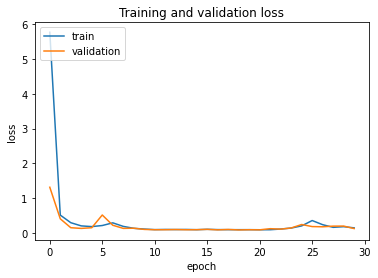

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 5.3808 - root_mean_squared_error: 2.2084 - val_loss: 0.8282 - val_root_mean_squared_error: 0.8327
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 0.8190 - root_mean_squared_error: 0.8305 - val_loss: 0.2701 - val_root_mean_squared_error: 0.4128
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2639 - root_mean_squared_error: 0.4151 - val_loss: 0.1911 - val_root_mean_squared_error: 0.3587
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2018 - root_mean_squared_error: 0.3384 - val_loss: 0.1746 - val_root_mean_squared_error: 0.2875
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2120 - root_mean_squared_error: 0.3622 - val_loss: 0.1550 - val_root_mean_squared_error: 0.2622
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1581 - root_mean_squared_error: 0.2774 - val_loss: 0.1542 - val_root_mean_s

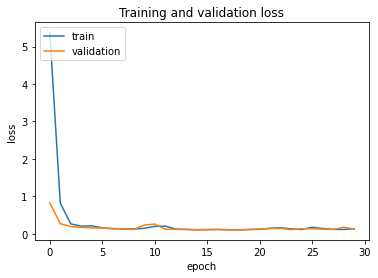

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 0.6941 - root_mean_squared_error: 0.7981 - val_loss: 0.3467 - val_root_mean_squared_error: 0.5321
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2585 - root_mean_squared_error: 0.4366 - val_loss: 0.1885 - val_root_mean_squared_error: 0.3330
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1699 - root_mean_squared_error: 0.3050 - val_loss: 0.1488 - val_root_mean_squared_error: 0.2767
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1391 - root_mean_squared_error: 0.2488 - val_loss: 0.1168 - val_root_mean_squared_error: 0.2010
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1194 - root_mean_squared_error: 0.1984 - val_loss: 0.1186 - val_root_mean_squared_error: 0.1966
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1168 - root_mean_squared_error: 0.1954 - val_loss: 0.1126 - val_root_mean_s

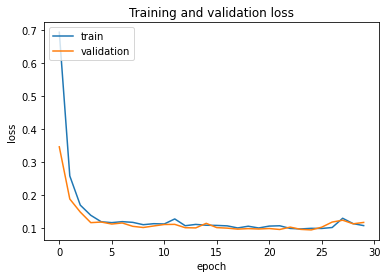

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 0.6072 - root_mean_squared_error: 0.7442 - val_loss: 0.4384 - val_root_mean_squared_error: 0.6027
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2988 - root_mean_squared_error: 0.4810 - val_loss: 0.1921 - val_root_mean_squared_error: 0.3444
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1633 - root_mean_squared_error: 0.2944 - val_loss: 0.1546 - val_root_mean_squared_error: 0.2784
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1360 - root_mean_squared_error: 0.2395 - val_loss: 0.1256 - val_root_mean_squared_error: 0.1964
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1216 - root_mean_squared_error: 0.2008 - val_loss: 0.1167 - val_root_mean_squared_error: 0.1918
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1183 - root_mean_squared_error: 0.1926 - val_loss: 0.1231 - val_root_mean_s

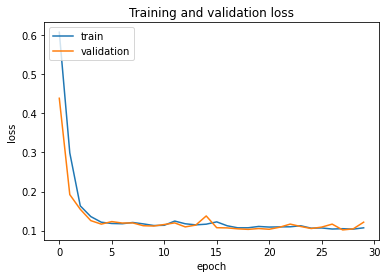

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 0.7428 - root_mean_squared_error: 0.8151 - val_loss: 0.2634 - val_root_mean_squared_error: 0.4243
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2172 - root_mean_squared_error: 0.3681 - val_loss: 0.1583 - val_root_mean_squared_error: 0.2821
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1507 - root_mean_squared_error: 0.2650 - val_loss: 0.1653 - val_root_mean_squared_error: 0.2806
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1523 - root_mean_squared_error: 0.2735 - val_loss: 0.1349 - val_root_mean_squared_error: 0.2272
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1360 - root_mean_squared_error: 0.2328 - val_loss: 0.1325 - val_root_mean_squared_error: 0.2336
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1148 - root_mean_squared_error: 0.1884 - val_loss: 0.1134 - val_root_mean_s

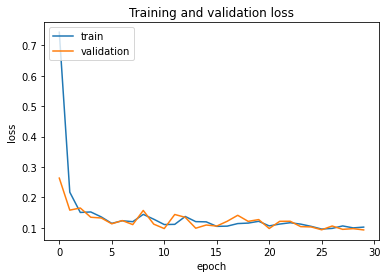

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 0.8373 - root_mean_squared_error: 0.8604 - val_loss: 0.4001 - val_root_mean_squared_error: 0.5539
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2624 - root_mean_squared_error: 0.4154 - val_loss: 0.1942 - val_root_mean_squared_error: 0.3355
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1604 - root_mean_squared_error: 0.2791 - val_loss: 0.1333 - val_root_mean_squared_error: 0.2276
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1311 - root_mean_squared_error: 0.2239 - val_loss: 0.1305 - val_root_mean_squared_error: 0.2109
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1262 - root_mean_squared_error: 0.2041 - val_loss: 0.1156 - val_root_mean_squared_error: 0.2047
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 0.1244 - root_mean_squared_error: 0.2106 - val_loss: 0.1332 - val_root_mean_s

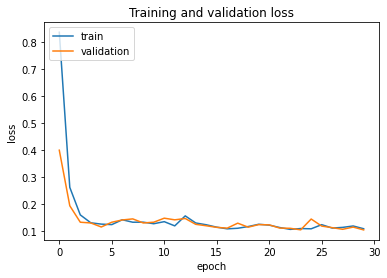

Epoch 1/30
22/22 [==============================] - 1s 27ms/step - loss: 1.3829 - root_mean_squared_error: 1.1562 - val_loss: 0.8751 - val_root_mean_squared_error: 0.9160
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 0.7002 - root_mean_squared_error: 0.8163 - val_loss: 0.5543 - val_root_mean_squared_error: 0.7201
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 0.5116 - root_mean_squared_error: 0.6864 - val_loss: 0.4594 - val_root_mean_squared_error: 0.6430
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 0.4336 - root_mean_squared_error: 0.6200 - val_loss: 0.4012 - val_root_mean_squared_error: 0.5909
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.3818 - root_mean_squared_error: 0.5726 - val_loss: 0.3580 - val_root_mean_squared_error: 0.5501
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 0.3445 - root_mean_squared_error: 0.5357 - val_loss: 0.3206 - val_root_mean_s

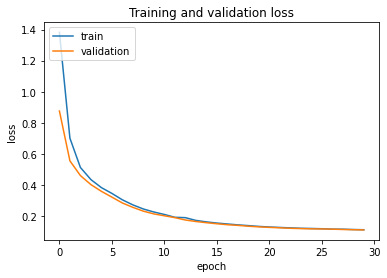

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 0.9734 - root_mean_squared_error: 0.9795 - val_loss: 0.7391 - val_root_mean_squared_error: 0.8556
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 0.6623 - root_mean_squared_error: 0.8072 - val_loss: 0.5694 - val_root_mean_squared_error: 0.7439
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 0.5282 - root_mean_squared_error: 0.7117 - val_loss: 0.4746 - val_root_mean_squared_error: 0.6681
Epoch 4/30
22/22 [==============================] - 0s 5ms/step - loss: 0.4523 - root_mean_squared_error: 0.6476 - val_loss: 0.4171 - val_root_mean_squared_error: 0.6167
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.3980 - root_mean_squared_error: 0.5982 - val_loss: 0.3684 - val_root_mean_squared_error: 0.5697
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.3523 - root_mean_squared_error: 0.5536 - val_loss: 0.3270 - val_root_mean_s

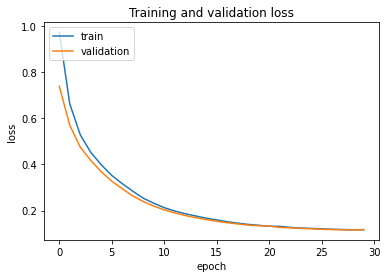

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 1.4860 - root_mean_squared_error: 1.2007 - val_loss: 1.4113 - val_root_mean_squared_error: 1.1703
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 1.3559 - root_mean_squared_error: 1.1474 - val_loss: 1.2938 - val_root_mean_squared_error: 1.1210
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 1.2464 - root_mean_squared_error: 1.1004 - val_loss: 1.1931 - val_root_mean_squared_error: 1.0768
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 1.1533 - root_mean_squared_error: 1.0588 - val_loss: 1.1076 - val_root_mean_squared_error: 1.0376
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 1.0729 - root_mean_squared_error: 1.0213 - val_loss: 1.0342 - val_root_mean_squared_error: 1.0027
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 1.0039 - root_mean_squared_error: 0.9878 - val_loss: 0.9708 - val_root_mean_s

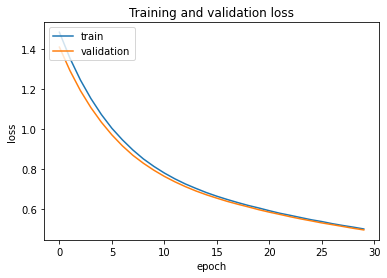

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 1.3468 - root_mean_squared_error: 1.1467 - val_loss: 1.2683 - val_root_mean_squared_error: 1.1144
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 1.2104 - root_mean_squared_error: 1.0900 - val_loss: 1.1494 - val_root_mean_squared_error: 1.0637
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 1.1052 - root_mean_squared_error: 1.0440 - val_loss: 1.0578 - val_root_mean_squared_error: 1.0225
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 1.0246 - root_mean_squared_error: 1.0071 - val_loss: 0.9880 - val_root_mean_squared_error: 0.9897
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.9622 - root_mean_squared_error: 0.9771 - val_loss: 0.9340 - val_root_mean_squared_error: 0.9632
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 0.9132 - root_mean_squared_error: 0.9527 - val_loss: 0.8921 - val_root_mean_s

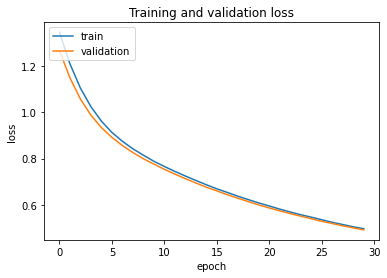

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 1.7952 - root_mean_squared_error: 1.3158 - val_loss: 1.7839 - val_root_mean_squared_error: 1.3117
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 1.7745 - root_mean_squared_error: 1.3083 - val_loss: 1.7639 - val_root_mean_squared_error: 1.3044
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 1.7548 - root_mean_squared_error: 1.3011 - val_loss: 1.7438 - val_root_mean_squared_error: 1.2971
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 1.7349 - root_mean_squared_error: 1.2938 - val_loss: 1.7244 - val_root_mean_squared_error: 1.2900
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 1.7157 - root_mean_squared_error: 1.2868 - val_loss: 1.7057 - val_root_mean_squared_error: 1.2830
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 1.6968 - root_mean_squared_error: 1.2797 - val_loss: 1.6868 - val_root_mean_s

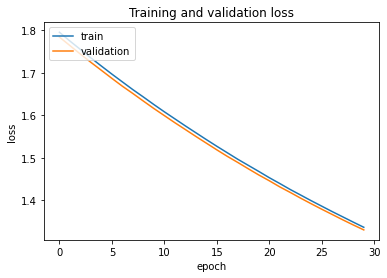

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 1.4774 - root_mean_squared_error: 1.2010 - val_loss: 1.4696 - val_root_mean_squared_error: 1.1980
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 1.4630 - root_mean_squared_error: 1.1954 - val_loss: 1.4550 - val_root_mean_squared_error: 1.1923
Epoch 3/30
22/22 [==============================] - 0s 5ms/step - loss: 1.4485 - root_mean_squared_error: 1.1898 - val_loss: 1.4411 - val_root_mean_squared_error: 1.1869
Epoch 4/30
22/22 [==============================] - 0s 6ms/step - loss: 1.4349 - root_mean_squared_error: 1.1845 - val_loss: 1.4270 - val_root_mean_squared_error: 1.1814
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 1.4212 - root_mean_squared_error: 1.1791 - val_loss: 1.4142 - val_root_mean_squared_error: 1.1764
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 1.4082 - root_mean_squared_error: 1.1740 - val_loss: 1.4013 - val_root_mean_s

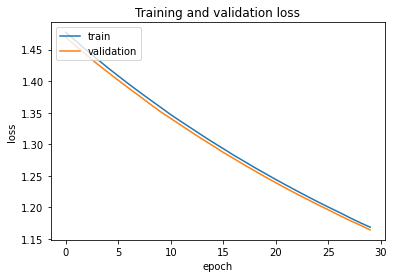

Epoch 1/40
22/22 [==============================] - 1s 23ms/step - loss: 545.8101 - root_mean_squared_error: 23.3262 - val_loss: 62.9630 - val_root_mean_squared_error: 7.8901
Epoch 2/40
22/22 [==============================] - 0s 12ms/step - loss: 29.8431 - root_mean_squared_error: 5.4244 - val_loss: 19.2661 - val_root_mean_squared_error: 4.3528
Epoch 3/40
22/22 [==============================] - 0s 14ms/step - loss: 8.4967 - root_mean_squared_error: 2.8766 - val_loss: 3.5328 - val_root_mean_squared_error: 1.8364
Epoch 4/40
22/22 [==============================] - 0s 11ms/step - loss: 2.3107 - root_mean_squared_error: 1.4772 - val_loss: 2.2797 - val_root_mean_squared_error: 1.4655
Epoch 5/40
22/22 [==============================] - 0s 12ms/step - loss: 2.4816 - root_mean_squared_error: 1.5326 - val_loss: 2.8658 - val_root_mean_squared_error: 1.6454
Epoch 6/40
22/22 [==============================] - 0s 10ms/step - loss: 1.8120 - root_mean_squared_error: 1.3009 - val_loss: 0.9860 - val_

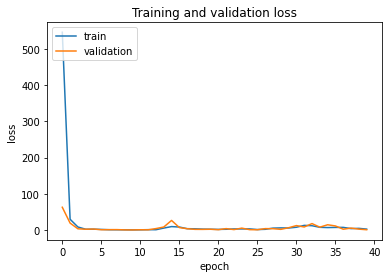

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 551.1984 - root_mean_squared_error: 22.3865 - val_loss: 119.1725 - val_root_mean_squared_error: 10.4297
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 63.5102 - root_mean_squared_error: 7.5952 - val_loss: 31.2043 - val_root_mean_squared_error: 5.2967
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 14.2279 - root_mean_squared_error: 3.5927 - val_loss: 6.6697 - val_root_mean_squared_error: 2.4656
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 2.6824 - root_mean_squared_error: 1.5458 - val_loss: 1.2325 - val_root_mean_squared_error: 1.0314
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 1.0623 - root_mean_squared_error: 0.9601 - val_loss: 0.8449 - val_root_mean_squared_error: 0.8224
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.7315 - root_mean_squared_error: 0.7795 - val_loss: 0.8638 - val_ro

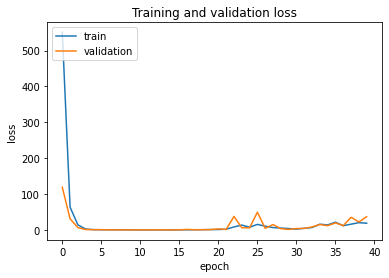

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 47.6906 - root_mean_squared_error: 6.8689 - val_loss: 6.9450 - val_root_mean_squared_error: 2.6002
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 3.3473 - root_mean_squared_error: 1.7883 - val_loss: 1.2032 - val_root_mean_squared_error: 1.0429
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 0.6964 - root_mean_squared_error: 0.7804 - val_loss: 0.3714 - val_root_mean_squared_error: 0.5383
Epoch 4/40
22/22 [==============================] - 0s 7ms/step - loss: 0.3099 - root_mean_squared_error: 0.4800 - val_loss: 0.2952 - val_root_mean_squared_error: 0.4557
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.3302 - root_mean_squared_error: 0.5000 - val_loss: 0.4990 - val_root_mean_squared_error: 0.6342
Epoch 6/40
22/22 [==============================] - 0s 6ms/step - loss: 0.4120 - root_mean_squared_error: 0.5748 - val_loss: 0.7919 - val_root_mean_

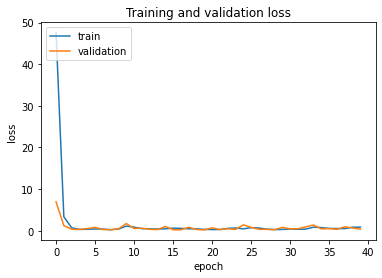

Epoch 1/40
22/22 [==============================] - 1s 27ms/step - loss: 61.6771 - root_mean_squared_error: 7.4908 - val_loss: 5.6323 - val_root_mean_squared_error: 2.2925
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 6.1931 - root_mean_squared_error: 2.3738 - val_loss: 0.7612 - val_root_mean_squared_error: 0.8134
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 0.9963 - root_mean_squared_error: 0.9232 - val_loss: 0.3727 - val_root_mean_squared_error: 0.5345
Epoch 4/40
22/22 [==============================] - 0s 7ms/step - loss: 0.3488 - root_mean_squared_error: 0.5205 - val_loss: 0.2858 - val_root_mean_squared_error: 0.4219
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 0.2879 - root_mean_squared_error: 0.4498 - val_loss: 0.2572 - val_root_mean_squared_error: 0.4125
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.2067 - root_mean_squared_error: 0.3582 - val_loss: 0.1828 - val_root_mean_

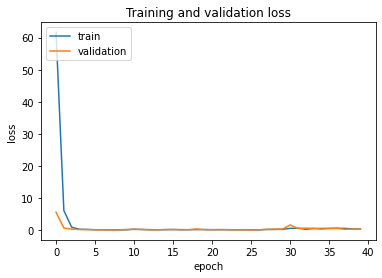

Epoch 1/40
22/22 [==============================] - 1s 16ms/step - loss: 6.3644 - root_mean_squared_error: 2.4836 - val_loss: 1.6454 - val_root_mean_squared_error: 1.2387
Epoch 2/40
22/22 [==============================] - 0s 9ms/step - loss: 0.7889 - root_mean_squared_error: 0.8343 - val_loss: 0.3472 - val_root_mean_squared_error: 0.5266
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 0.4577 - root_mean_squared_error: 0.6109 - val_loss: 0.4026 - val_root_mean_squared_error: 0.5620
Epoch 4/40
22/22 [==============================] - 0s 10ms/step - loss: 0.2033 - root_mean_squared_error: 0.3468 - val_loss: 0.1337 - val_root_mean_squared_error: 0.2377
Epoch 5/40
22/22 [==============================] - 0s 14ms/step - loss: 0.1551 - root_mean_squared_error: 0.2714 - val_loss: 0.1791 - val_root_mean_squared_error: 0.3313
Epoch 6/40
22/22 [==============================] - 0s 12ms/step - loss: 0.1493 - root_mean_squared_error: 0.2639 - val_loss: 0.1406 - val_root_mea

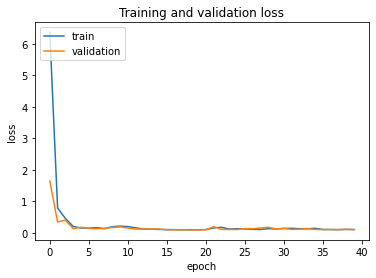

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 6.3750 - root_mean_squared_error: 2.4024 - val_loss: 1.2142 - val_root_mean_squared_error: 1.0356
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 0.6637 - root_mean_squared_error: 0.7376 - val_loss: 0.2339 - val_root_mean_squared_error: 0.4218
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 0.2079 - root_mean_squared_error: 0.3660 - val_loss: 0.1632 - val_root_mean_squared_error: 0.2615
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1512 - root_mean_squared_error: 0.2667 - val_loss: 0.1212 - val_root_mean_squared_error: 0.2065
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1283 - root_mean_squared_error: 0.2228 - val_loss: 0.1343 - val_root_mean_squared_error: 0.1910
Epoch 6/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1255 - root_mean_squared_error: 0.2084 - val_loss: 0.1483 - val_root_mean_s

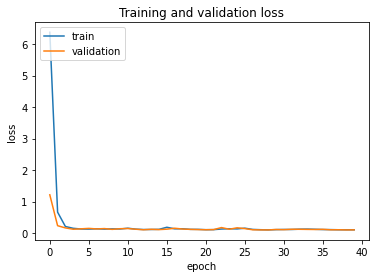

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 0.7266 - root_mean_squared_error: 0.8133 - val_loss: 0.3846 - val_root_mean_squared_error: 0.5668
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 0.2816 - root_mean_squared_error: 0.4654 - val_loss: 0.2005 - val_root_mean_squared_error: 0.3416
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1775 - root_mean_squared_error: 0.3169 - val_loss: 0.1391 - val_root_mean_squared_error: 0.2438
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1472 - root_mean_squared_error: 0.2598 - val_loss: 0.1306 - val_root_mean_squared_error: 0.2393
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1258 - root_mean_squared_error: 0.2209 - val_loss: 0.1119 - val_root_mean_squared_error: 0.1835
Epoch 6/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1132 - root_mean_squared_error: 0.1882 - val_loss: 0.1180 - val_root_mean_s

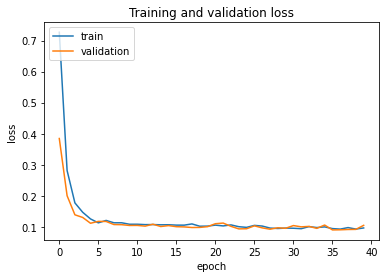

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 0.7073 - root_mean_squared_error: 0.8099 - val_loss: 0.3472 - val_root_mean_squared_error: 0.5337
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 0.2578 - root_mean_squared_error: 0.4405 - val_loss: 0.1806 - val_root_mean_squared_error: 0.3260
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1644 - root_mean_squared_error: 0.2924 - val_loss: 0.1506 - val_root_mean_squared_error: 0.2759
Epoch 4/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1395 - root_mean_squared_error: 0.2451 - val_loss: 0.1312 - val_root_mean_squared_error: 0.2248
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1317 - root_mean_squared_error: 0.2287 - val_loss: 0.1294 - val_root_mean_squared_error: 0.1983
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1287 - root_mean_squared_error: 0.2155 - val_loss: 0.1472 - val_root_mean_s

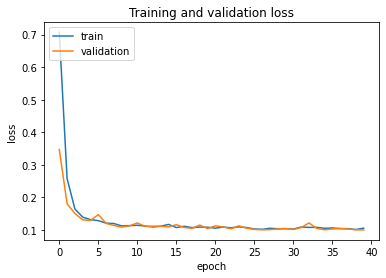

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 0.8993 - root_mean_squared_error: 0.9050 - val_loss: 0.4481 - val_root_mean_squared_error: 0.6069
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 0.2469 - root_mean_squared_error: 0.4064 - val_loss: 0.1584 - val_root_mean_squared_error: 0.2834
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1418 - root_mean_squared_error: 0.2464 - val_loss: 0.1262 - val_root_mean_squared_error: 0.2147
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1181 - root_mean_squared_error: 0.1970 - val_loss: 0.1176 - val_root_mean_squared_error: 0.1964
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1218 - root_mean_squared_error: 0.2049 - val_loss: 0.1059 - val_root_mean_squared_error: 0.1622
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1247 - root_mean_squared_error: 0.2093 - val_loss: 0.1139 - val_root_mean_s

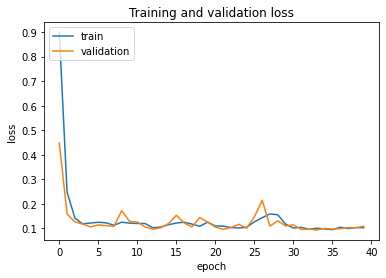

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 0.9245 - root_mean_squared_error: 0.9087 - val_loss: 0.2786 - val_root_mean_squared_error: 0.4492
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 0.2375 - root_mean_squared_error: 0.3900 - val_loss: 0.1692 - val_root_mean_squared_error: 0.3004
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1557 - root_mean_squared_error: 0.2709 - val_loss: 0.1406 - val_root_mean_squared_error: 0.2267
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1419 - root_mean_squared_error: 0.2455 - val_loss: 0.1291 - val_root_mean_squared_error: 0.2005
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.1294 - root_mean_squared_error: 0.2109 - val_loss: 0.1828 - val_root_mean_squared_error: 0.3221
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1570 - root_mean_squared_error: 0.2761 - val_loss: 0.1357 - val_root_mean_s

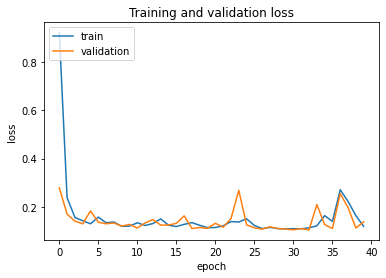

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 1.0969 - root_mean_squared_error: 1.0333 - val_loss: 0.8030 - val_root_mean_squared_error: 0.8869
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 0.7278 - root_mean_squared_error: 0.8400 - val_loss: 0.6332 - val_root_mean_squared_error: 0.7780
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 0.5861 - root_mean_squared_error: 0.7435 - val_loss: 0.5192 - val_root_mean_squared_error: 0.6922
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 0.4879 - root_mean_squared_error: 0.6661 - val_loss: 0.4472 - val_root_mean_squared_error: 0.6320
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.4237 - root_mean_squared_error: 0.6098 - val_loss: 0.3918 - val_root_mean_squared_error: 0.5803
Epoch 6/40
22/22 [==============================] - 0s 6ms/step - loss: 0.3736 - root_mean_squared_error: 0.5629 - val_loss: 0.3475 - val_root_mean_s

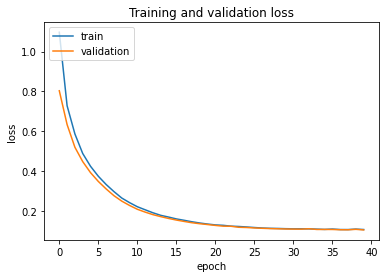

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 1.0399 - root_mean_squared_error: 1.0133 - val_loss: 0.8067 - val_root_mean_squared_error: 0.8955
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 0.7200 - root_mean_squared_error: 0.8440 - val_loss: 0.6164 - val_root_mean_squared_error: 0.7775
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 0.5674 - root_mean_squared_error: 0.7420 - val_loss: 0.5048 - val_root_mean_squared_error: 0.6942
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 0.4761 - root_mean_squared_error: 0.6685 - val_loss: 0.4296 - val_root_mean_squared_error: 0.6284
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 0.4149 - root_mean_squared_error: 0.6140 - val_loss: 0.3819 - val_root_mean_squared_error: 0.5846
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.3681 - root_mean_squared_error: 0.5690 - val_loss: 0.3380 - val_root_mean_s

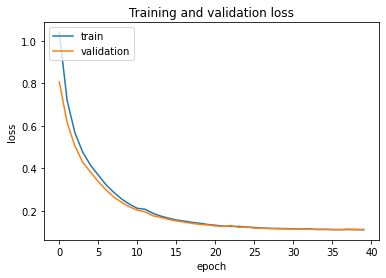

Epoch 1/40
22/22 [==============================] - 1s 27ms/step - loss: 1.4693 - root_mean_squared_error: 1.1922 - val_loss: 1.3889 - val_root_mean_squared_error: 1.1598
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 1.3310 - root_mean_squared_error: 1.1360 - val_loss: 1.2658 - val_root_mean_squared_error: 1.1083
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 1.2188 - root_mean_squared_error: 1.0880 - val_loss: 1.1671 - val_root_mean_squared_error: 1.0650
Epoch 4/40
22/22 [==============================] - 0s 7ms/step - loss: 1.1285 - root_mean_squared_error: 1.0474 - val_loss: 1.0847 - val_root_mean_squared_error: 1.0271
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 1.0521 - root_mean_squared_error: 1.0117 - val_loss: 1.0159 - val_root_mean_squared_error: 0.9943
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.9871 - root_mean_squared_error: 0.9802 - val_loss: 0.9565 - val_root_mean_s

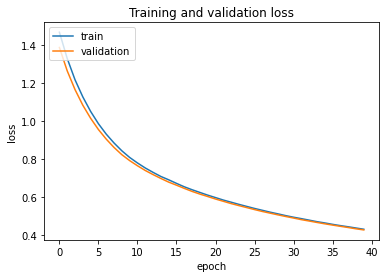

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 1.3512 - root_mean_squared_error: 1.1475 - val_loss: 1.2695 - val_root_mean_squared_error: 1.1141
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 1.2121 - root_mean_squared_error: 1.0899 - val_loss: 1.1523 - val_root_mean_squared_error: 1.0642
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 1.1087 - root_mean_squared_error: 1.0450 - val_loss: 1.0605 - val_root_mean_squared_error: 1.0231
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 1.0290 - root_mean_squared_error: 1.0086 - val_loss: 0.9935 - val_root_mean_squared_error: 0.9918
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 0.9699 - root_mean_squared_error: 0.9805 - val_loss: 0.9421 - val_root_mean_squared_error: 0.9668
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.9239 - root_mean_squared_error: 0.9578 - val_loss: 0.9012 - val_root_mean_s

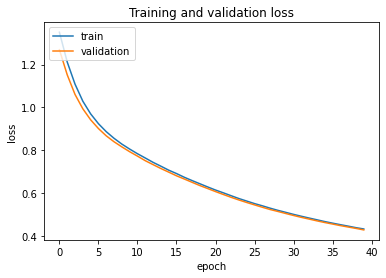

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 1.2480 - root_mean_squared_error: 1.1003 - val_loss: 1.2410 - val_root_mean_squared_error: 1.0973
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 1.2353 - root_mean_squared_error: 1.0948 - val_loss: 1.2288 - val_root_mean_squared_error: 1.0920
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 1.2232 - root_mean_squared_error: 1.0897 - val_loss: 1.2170 - val_root_mean_squared_error: 1.0870
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 1.2117 - root_mean_squared_error: 1.0847 - val_loss: 1.2054 - val_root_mean_squared_error: 1.0820
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 1.2002 - root_mean_squared_error: 1.0797 - val_loss: 1.1943 - val_root_mean_squared_error: 1.0772
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 1.1892 - root_mean_squared_error: 1.0749 - val_loss: 1.1834 - val_root_mean_s

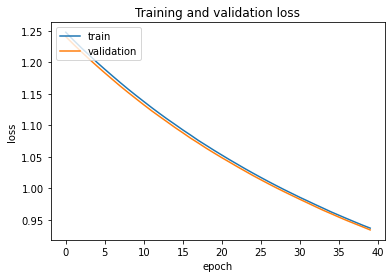

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 1.2286 - root_mean_squared_error: 1.0980 - val_loss: 1.2216 - val_root_mean_squared_error: 1.0950
Epoch 2/40
22/22 [==============================] - 0s 6ms/step - loss: 1.2160 - root_mean_squared_error: 1.0926 - val_loss: 1.2092 - val_root_mean_squared_error: 1.0898
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 1.2036 - root_mean_squared_error: 1.0874 - val_loss: 1.1974 - val_root_mean_squared_error: 1.0847
Epoch 4/40
22/22 [==============================] - 0s 6ms/step - loss: 1.1918 - root_mean_squared_error: 1.0823 - val_loss: 1.1857 - val_root_mean_squared_error: 1.0797
Epoch 5/40
22/22 [==============================] - 0s 6ms/step - loss: 1.1802 - root_mean_squared_error: 1.0773 - val_loss: 1.1741 - val_root_mean_squared_error: 1.0746
Epoch 6/40
22/22 [==============================] - 0s 6ms/step - loss: 1.1690 - root_mean_squared_error: 1.0724 - val_loss: 1.1627 - val_root_mean_s

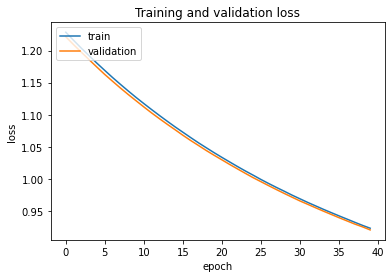

Epoch 1/10
22/22 [==============================] - 1s 13ms/step - loss: 60872.1953 - root_mean_squared_error: 246.6966 - val_loss: 115961.2734 - val_root_mean_squared_error: 340.5051
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 81910.5781 - root_mean_squared_error: 286.1757 - val_loss: 14845.7207 - val_root_mean_squared_error: 121.8108
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 17337.8906 - root_mean_squared_error: 131.6456 - val_loss: 7977.2241 - val_root_mean_squared_error: 89.2881
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 8747.3877 - root_mean_squared_error: 93.5048 - val_loss: 4997.1167 - val_root_mean_squared_error: 70.6691
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 9034.7617 - root_mean_squared_error: 95.0306 - val_loss: 3065.5710 - val_root_mean_squared_error: 55.3435
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 1664.8226 - root_mean_squa

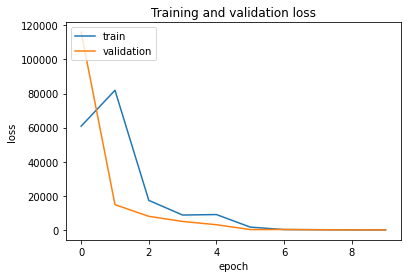

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 44289.5273 - root_mean_squared_error: 200.6502 - val_loss: 162787.6875 - val_root_mean_squared_error: 384.7156
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 51854.3047 - root_mean_squared_error: 217.1168 - val_loss: 18095.0020 - val_root_mean_squared_error: 128.2467
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 64541.5625 - root_mean_squared_error: 242.2302 - val_loss: 17899.0840 - val_root_mean_squared_error: 127.5542
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 31236.6621 - root_mean_squared_error: 168.5095 - val_loss: 5538.7876 - val_root_mean_squared_error: 70.9572
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 6579.8857 - root_mean_squared_error: 77.3393 - val_loss: 22018.0957 - val_root_mean_squared_error: 141.4833
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 89587.7031 - root_me

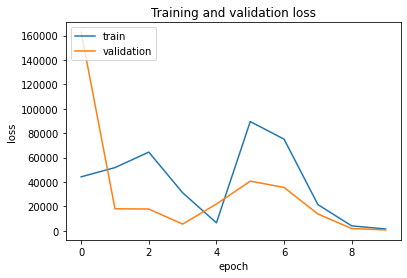

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 247.9060 - root_mean_squared_error: 15.7160 - val_loss: 222.0643 - val_root_mean_squared_error: 14.8707
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 96.4486 - root_mean_squared_error: 9.7932 - val_loss: 346.9763 - val_root_mean_squared_error: 18.6037
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 177.9278 - root_mean_squared_error: 13.3155 - val_loss: 187.4493 - val_root_mean_squared_error: 13.6641
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 271.5349 - root_mean_squared_error: 16.4578 - val_loss: 60.9772 - val_root_mean_squared_error: 7.7873
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 91.6064 - root_mean_squared_error: 9.5469 - val_loss: 33.6365 - val_root_mean_squared_error: 5.7699
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 82.6773 - root_mean_squared_error: 9.0698 - val_loss: 4

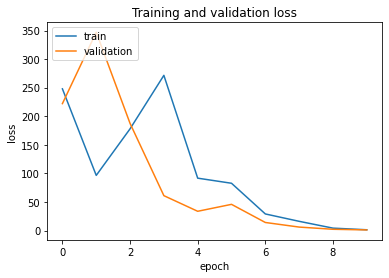

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 445.8171 - root_mean_squared_error: 20.1356 - val_loss: 391.8053 - val_root_mean_squared_error: 18.8927
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 193.1563 - root_mean_squared_error: 13.2510 - val_loss: 72.2699 - val_root_mean_squared_error: 8.1106
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 77.4986 - root_mean_squared_error: 8.3926 - val_loss: 73.6544 - val_root_mean_squared_error: 8.1910
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 37.9570 - root_mean_squared_error: 5.8747 - val_loss: 9.3680 - val_root_mean_squared_error: 2.9104
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 7.0247 - root_mean_squared_error: 2.5355 - val_loss: 2.7993 - val_root_mean_squared_error: 1.6030
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 2.7130 - root_mean_squared_error: 1.5898 - val_loss: 1.1850 - va

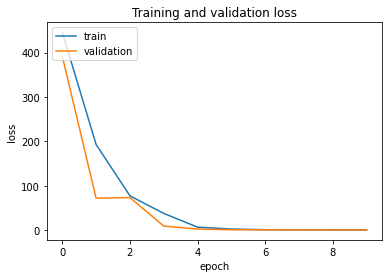

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 8.5986 - root_mean_squared_error: 2.9032 - val_loss: 6.8053 - val_root_mean_squared_error: 2.5777
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 4.9020 - root_mean_squared_error: 2.1803 - val_loss: 2.3017 - val_root_mean_squared_error: 1.4719
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 2.6972 - root_mean_squared_error: 1.6166 - val_loss: 0.5832 - val_root_mean_squared_error: 0.7232
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.5461 - root_mean_squared_error: 0.6921 - val_loss: 0.3524 - val_root_mean_squared_error: 0.5081
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3256 - root_mean_squared_error: 0.4940 - val_loss: 0.3960 - val_root_mean_squared_error: 0.5492
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3117 - root_mean_squared_error: 0.4860 - val_loss: 0.3470 - val_root_mean_s

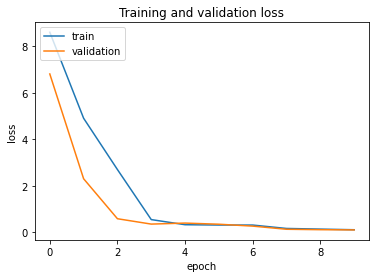

Epoch 1/10
22/22 [==============================] - 1s 27ms/step - loss: 6.3333 - root_mean_squared_error: 2.3990 - val_loss: 3.4786 - val_root_mean_squared_error: 1.7376
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 7.1531 - root_mean_squared_error: 2.5424 - val_loss: 6.0594 - val_root_mean_squared_error: 2.3117
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 3.1877 - root_mean_squared_error: 1.6984 - val_loss: 1.5446 - val_root_mean_squared_error: 1.1820
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 2.1499 - root_mean_squared_error: 1.3793 - val_loss: 5.3555 - val_root_mean_squared_error: 2.2281
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 3.2280 - root_mean_squared_error: 1.7062 - val_loss: 3.5714 - val_root_mean_squared_error: 1.7651
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 4.7123 - root_mean_squared_error: 2.0585 - val_loss: 1.1995 - val_root_mean_s

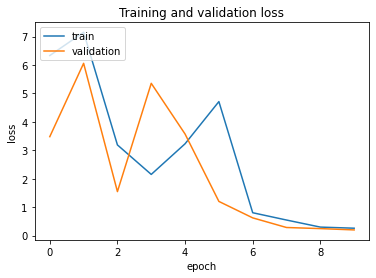

Epoch 1/10
22/22 [==============================] - 1s 13ms/step - loss: 0.4199 - root_mean_squared_error: 0.5927 - val_loss: 0.1604 - val_root_mean_squared_error: 0.2891
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1625 - root_mean_squared_error: 0.2903 - val_loss: 0.1815 - val_root_mean_squared_error: 0.3057
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1346 - root_mean_squared_error: 0.2367 - val_loss: 0.1311 - val_root_mean_squared_error: 0.2426
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1146 - root_mean_squared_error: 0.1893 - val_loss: 0.1079 - val_root_mean_squared_error: 0.1668
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1310 - root_mean_squared_error: 0.2270 - val_loss: 0.1202 - val_root_mean_squared_error: 0.2055
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1149 - root_mean_squared_error: 0.1925 - val_loss: 0.1114 - val_root_mean_s

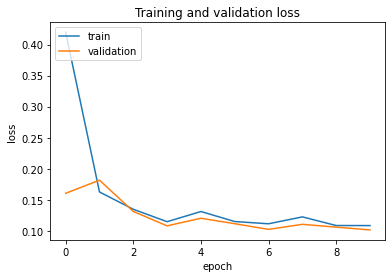

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.4015 - root_mean_squared_error: 0.5707 - val_loss: 0.1792 - val_root_mean_squared_error: 0.3049
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1956 - root_mean_squared_error: 0.3339 - val_loss: 0.1371 - val_root_mean_squared_error: 0.2432
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 0.1427 - root_mean_squared_error: 0.2586 - val_loss: 0.1178 - val_root_mean_squared_error: 0.1677
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1631 - root_mean_squared_error: 0.2718 - val_loss: 0.1399 - val_root_mean_squared_error: 0.2641
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 0.1344 - root_mean_squared_error: 0.2297 - val_loss: 0.1266 - val_root_mean_squared_error: 0.2283
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1364 - root_mean_squared_error: 0.2391 - val_loss: 0.1155 - val_root_mean_s

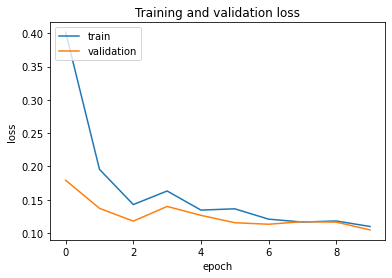

Epoch 1/10
22/22 [==============================] - 1s 10ms/step - loss: 0.6229 - root_mean_squared_error: 0.7411 - val_loss: 0.3942 - val_root_mean_squared_error: 0.5649
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 0.3825 - root_mean_squared_error: 0.5482 - val_loss: 0.4598 - val_root_mean_squared_error: 0.6078
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2835 - root_mean_squared_error: 0.4547 - val_loss: 0.1756 - val_root_mean_squared_error: 0.3218
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1983 - root_mean_squared_error: 0.3449 - val_loss: 0.1517 - val_root_mean_squared_error: 0.2785
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1534 - root_mean_squared_error: 0.2722 - val_loss: 0.1812 - val_root_mean_squared_error: 0.3444
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 0.1963 - root_mean_squared_error: 0.3462 - val_loss: 0.1499 - val_root_mean_s

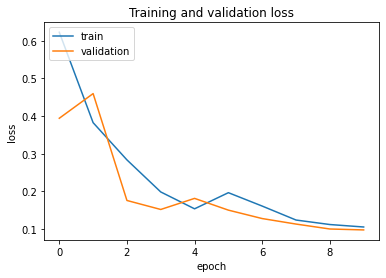

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.6388 - root_mean_squared_error: 0.7324 - val_loss: 0.4310 - val_root_mean_squared_error: 0.6060
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3145 - root_mean_squared_error: 0.4752 - val_loss: 0.2356 - val_root_mean_squared_error: 0.4023
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2374 - root_mean_squared_error: 0.3874 - val_loss: 0.1646 - val_root_mean_squared_error: 0.2985
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2286 - root_mean_squared_error: 0.3767 - val_loss: 0.1846 - val_root_mean_squared_error: 0.3398
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 0.1721 - root_mean_squared_error: 0.3030 - val_loss: 0.1273 - val_root_mean_squared_error: 0.2119
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1373 - root_mean_squared_error: 0.2286 - val_loss: 0.1244 - val_root_mean_s

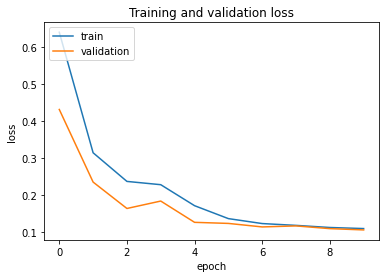

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.9241 - root_mean_squared_error: 0.9453 - val_loss: 0.6393 - val_root_mean_squared_error: 0.7741
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 0.5493 - root_mean_squared_error: 0.7080 - val_loss: 0.4554 - val_root_mean_squared_error: 0.6322
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 0.4089 - root_mean_squared_error: 0.5930 - val_loss: 0.3474 - val_root_mean_squared_error: 0.5372
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.3142 - root_mean_squared_error: 0.5025 - val_loss: 0.2763 - val_root_mean_squared_error: 0.4617
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 0.2522 - root_mean_squared_error: 0.4331 - val_loss: 0.2225 - val_root_mean_squared_error: 0.3959
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 0.2100 - root_mean_squared_error: 0.3750 - val_loss: 0.1875 - val_root_mean_s

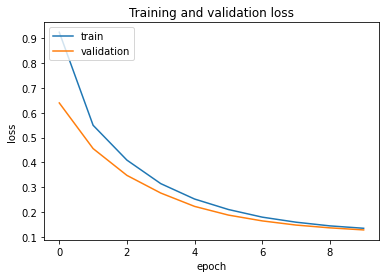

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.8760 - root_mean_squared_error: 0.9241 - val_loss: 0.5971 - val_root_mean_squared_error: 0.7531
Epoch 2/10
22/22 [==============================] - 0s 8ms/step - loss: 0.5006 - root_mean_squared_error: 0.6803 - val_loss: 0.4070 - val_root_mean_squared_error: 0.5986
Epoch 3/10
22/22 [==============================] - 0s 7ms/step - loss: 0.3653 - root_mean_squared_error: 0.5573 - val_loss: 0.3114 - val_root_mean_squared_error: 0.5077
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2834 - root_mean_squared_error: 0.4767 - val_loss: 0.2488 - val_root_mean_squared_error: 0.4355
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 0.2321 - root_mean_squared_error: 0.4117 - val_loss: 0.2097 - val_root_mean_squared_error: 0.3785
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 0.1986 - root_mean_squared_error: 0.3610 - val_loss: 0.1807 - val_root_mean_s

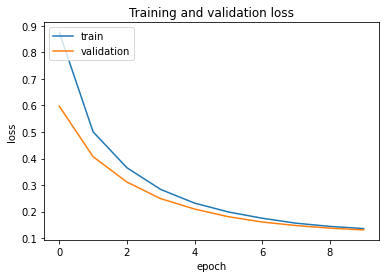

Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 1.2221 - root_mean_squared_error: 1.0926 - val_loss: 1.1691 - val_root_mean_squared_error: 1.0685
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 1.1280 - root_mean_squared_error: 1.0494 - val_loss: 1.0772 - val_root_mean_squared_error: 1.0251
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0429 - root_mean_squared_error: 1.0084 - val_loss: 1.0009 - val_root_mean_squared_error: 0.9874
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.9687 - root_mean_squared_error: 0.9711 - val_loss: 0.9270 - val_root_mean_squared_error: 0.9493
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 0.8994 - root_mean_squared_error: 0.9346 - val_loss: 0.8653 - val_root_mean_squared_error: 0.9161
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 0.8387 - root_mean_squared_error: 0.9012 - val_loss: 0.8093 - val_root_mean_s

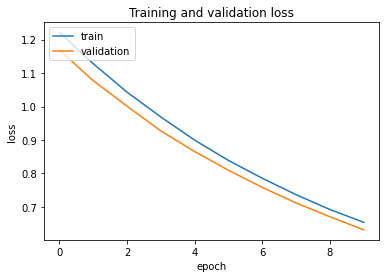

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 1.0533 - root_mean_squared_error: 1.0158 - val_loss: 1.0083 - val_root_mean_squared_error: 0.9938
Epoch 2/10
22/22 [==============================] - 0s 7ms/step - loss: 0.9753 - root_mean_squared_error: 0.9770 - val_loss: 0.9377 - val_root_mean_squared_error: 0.9577
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.9098 - root_mean_squared_error: 0.9430 - val_loss: 0.8782 - val_root_mean_squared_error: 0.9261
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 0.8547 - root_mean_squared_error: 0.9133 - val_loss: 0.8253 - val_root_mean_squared_error: 0.8970
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 0.8050 - root_mean_squared_error: 0.8855 - val_loss: 0.7808 - val_root_mean_squared_error: 0.8715
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 0.7619 - root_mean_squared_error: 0.8602 - val_loss: 0.7404 - val_root_mean_s

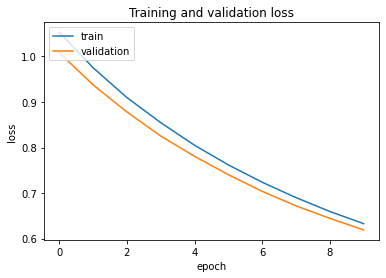

Epoch 1/10
22/22 [==============================] - 1s 28ms/step - loss: 1.1591 - root_mean_squared_error: 1.0621 - val_loss: 1.1542 - val_root_mean_squared_error: 1.0599
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 1.1503 - root_mean_squared_error: 1.0581 - val_loss: 1.1450 - val_root_mean_squared_error: 1.0556
Epoch 3/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1412 - root_mean_squared_error: 1.0538 - val_loss: 1.1363 - val_root_mean_squared_error: 1.0515
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1324 - root_mean_squared_error: 1.0497 - val_loss: 1.1273 - val_root_mean_squared_error: 1.0473
Epoch 5/10
22/22 [==============================] - 0s 7ms/step - loss: 1.1234 - root_mean_squared_error: 1.0455 - val_loss: 1.1186 - val_root_mean_squared_error: 1.0432
Epoch 6/10
22/22 [==============================] - 0s 8ms/step - loss: 1.1148 - root_mean_squared_error: 1.0414 - val_loss: 1.1098 - val_root_mean_s

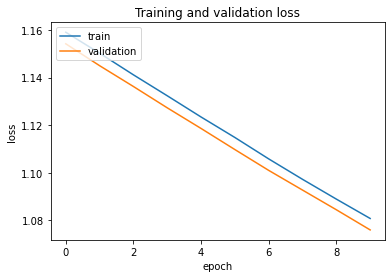

Epoch 1/10
22/22 [==============================] - 1s 13ms/step - loss: 1.0515 - root_mean_squared_error: 1.0180 - val_loss: 1.0471 - val_root_mean_squared_error: 1.0159
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 1.0438 - root_mean_squared_error: 1.0143 - val_loss: 1.0394 - val_root_mean_squared_error: 1.0121
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 1.0361 - root_mean_squared_error: 1.0105 - val_loss: 1.0318 - val_root_mean_squared_error: 1.0084
Epoch 4/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0285 - root_mean_squared_error: 1.0068 - val_loss: 1.0246 - val_root_mean_squared_error: 1.0048
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 1.0211 - root_mean_squared_error: 1.0031 - val_loss: 1.0169 - val_root_mean_squared_error: 1.0010
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 1.0138 - root_mean_squared_error: 0.9995 - val_loss: 1.0095 - val_root_mean_s

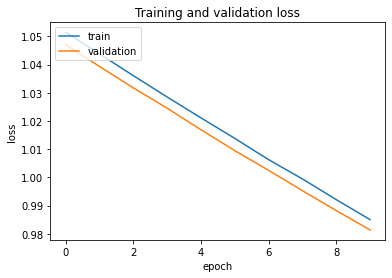

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 53459.6914 - root_mean_squared_error: 231.1872 - val_loss: 78724.1406 - val_root_mean_squared_error: 280.5465
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 43418.3242 - root_mean_squared_error: 208.3416 - val_loss: 32818.6289 - val_root_mean_squared_error: 181.1385
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 34439.0625 - root_mean_squared_error: 185.5558 - val_loss: 33913.0039 - val_root_mean_squared_error: 184.1337
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 37506.5430 - root_mean_squared_error: 193.6421 - val_loss: 11909.3447 - val_root_mean_squared_error: 109.1024
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 12628.3672 - root_mean_squared_error: 112.3549 - val_loss: 5507.5542 - val_root_mean_squared_error: 74.1953
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 8691.0029 - root_me

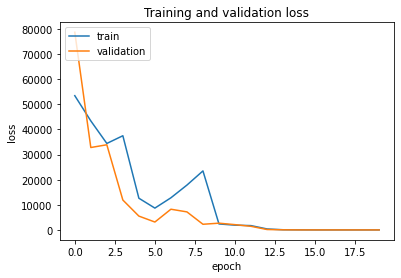

Epoch 1/20
22/22 [==============================] - 1s 13ms/step - loss: 27666.3086 - root_mean_squared_error: 158.5809 - val_loss: 13690.7314 - val_root_mean_squared_error: 111.5726
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 10873.7773 - root_mean_squared_error: 99.4223 - val_loss: 11141.1074 - val_root_mean_squared_error: 100.6393
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 5030.3193 - root_mean_squared_error: 67.6113 - val_loss: 20142.0117 - val_root_mean_squared_error: 135.3556
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 9391.6611 - root_mean_squared_error: 92.3994 - val_loss: 8181.5420 - val_root_mean_squared_error: 86.2565
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 7056.0894 - root_mean_squared_error: 80.0891 - val_loss: 31644.2461 - val_root_mean_squared_error: 169.5878
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 9949.3730 - root_mean_squa

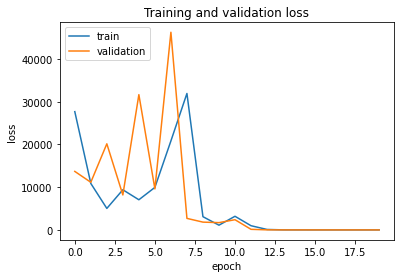

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 866.8742 - root_mean_squared_error: 29.4144 - val_loss: 160.2278 - val_root_mean_squared_error: 12.6311
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 295.6401 - root_mean_squared_error: 17.1691 - val_loss: 315.4249 - val_root_mean_squared_error: 17.7396
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 100.5367 - root_mean_squared_error: 10.0039 - val_loss: 63.4627 - val_root_mean_squared_error: 7.9376
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 101.3717 - root_mean_squared_error: 10.0450 - val_loss: 9.2977 - val_root_mean_squared_error: 3.0236
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 6.5408 - root_mean_squared_error: 2.5269 - val_loss: 6.0553 - val_root_mean_squared_error: 2.4335
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 6.9344 - root_mean_squared_error: 2.6094 - val_loss: 87.78

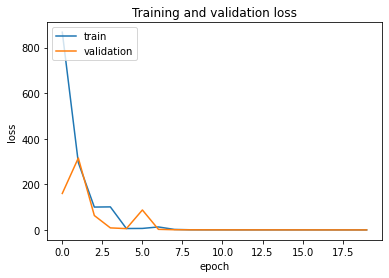

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 720.0491 - root_mean_squared_error: 25.5987 - val_loss: 80.6746 - val_root_mean_squared_error: 8.5605
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 299.4382 - root_mean_squared_error: 16.5024 - val_loss: 186.4989 - val_root_mean_squared_error: 13.0199
Epoch 3/20
22/22 [==============================] - 0s 8ms/step - loss: 212.8280 - root_mean_squared_error: 13.8955 - val_loss: 242.1574 - val_root_mean_squared_error: 14.7925
Epoch 4/20
22/22 [==============================] - 0s 8ms/step - loss: 203.3937 - root_mean_squared_error: 13.5979 - val_loss: 205.1865 - val_root_mean_squared_error: 13.6242
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 44.5251 - root_mean_squared_error: 6.3503 - val_loss: 303.1632 - val_root_mean_squared_error: 16.5993
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 63.9455 - root_mean_squared_error: 7.6225 - val_los

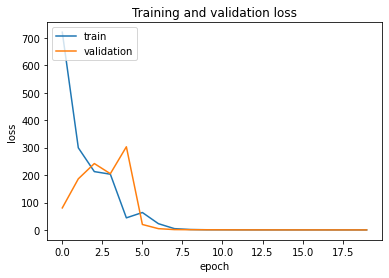

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 12.5283 - root_mean_squared_error: 3.5109 - val_loss: 8.0137 - val_root_mean_squared_error: 2.8031
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 21.1922 - root_mean_squared_error: 4.5732 - val_loss: 84.8621 - val_root_mean_squared_error: 9.1856
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 22.6507 - root_mean_squared_error: 4.7311 - val_loss: 7.5572 - val_root_mean_squared_error: 2.7243
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 13.9391 - root_mean_squared_error: 3.7086 - val_loss: 5.9238 - val_root_mean_squared_error: 2.4089
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 2.7287 - root_mean_squared_error: 1.6283 - val_loss: 1.0673 - val_root_mean_squared_error: 1.0043
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 0.6978 - root_mean_squared_error: 0.8044 - val_loss: 0.4915 - val_root_m

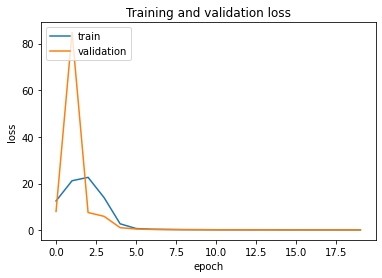

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 5.6303 - root_mean_squared_error: 2.2682 - val_loss: 3.3381 - val_root_mean_squared_error: 1.7032
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 2.9966 - root_mean_squared_error: 1.6323 - val_loss: 1.2327 - val_root_mean_squared_error: 1.0871
Epoch 3/20
22/22 [==============================] - 0s 8ms/step - loss: 1.4275 - root_mean_squared_error: 1.1295 - val_loss: 1.1716 - val_root_mean_squared_error: 0.9777
Epoch 4/20
22/22 [==============================] - 0s 8ms/step - loss: 1.0146 - root_mean_squared_error: 0.9361 - val_loss: 0.5125 - val_root_mean_squared_error: 0.6708
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 0.4118 - root_mean_squared_error: 0.5661 - val_loss: 0.3127 - val_root_mean_squared_error: 0.4809
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.2542 - root_mean_squared_error: 0.4057 - val_loss: 0.2407 - val_root_mean_s

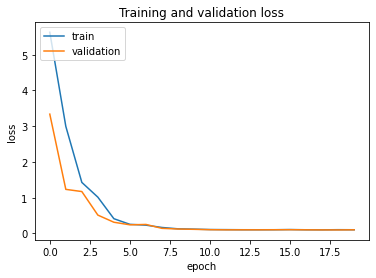

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 0.4062 - root_mean_squared_error: 0.5816 - val_loss: 0.2100 - val_root_mean_squared_error: 0.3588
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 0.2088 - root_mean_squared_error: 0.3655 - val_loss: 0.1535 - val_root_mean_squared_error: 0.2652
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1649 - root_mean_squared_error: 0.2929 - val_loss: 0.1328 - val_root_mean_squared_error: 0.2448
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1434 - root_mean_squared_error: 0.2570 - val_loss: 0.1188 - val_root_mean_squared_error: 0.1966
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1287 - root_mean_squared_error: 0.2238 - val_loss: 0.1133 - val_root_mean_squared_error: 0.1832
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1184 - root_mean_squared_error: 0.1993 - val_loss: 0.1175 - val_root_mean_s

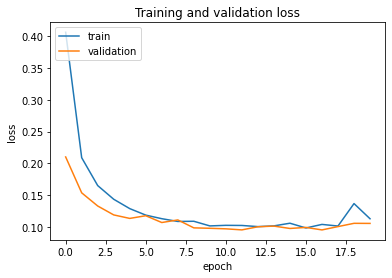

Epoch 1/20
22/22 [==============================] - 1s 26ms/step - loss: 0.3728 - root_mean_squared_error: 0.5412 - val_loss: 0.2850 - val_root_mean_squared_error: 0.4658
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.2124 - root_mean_squared_error: 0.3633 - val_loss: 0.1419 - val_root_mean_squared_error: 0.2347
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1320 - root_mean_squared_error: 0.2274 - val_loss: 0.1178 - val_root_mean_squared_error: 0.1785
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1210 - root_mean_squared_error: 0.1923 - val_loss: 0.1159 - val_root_mean_squared_error: 0.1928
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1156 - root_mean_squared_error: 0.1906 - val_loss: 0.1099 - val_root_mean_squared_error: 0.1498
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1132 - root_mean_squared_error: 0.1721 - val_loss: 0.1110 - val_root_mean_s

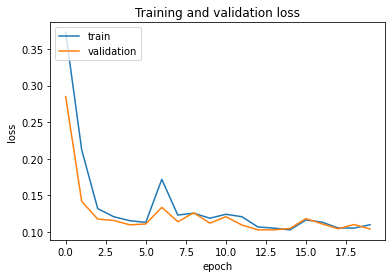

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 0.6556 - root_mean_squared_error: 0.7613 - val_loss: 0.2385 - val_root_mean_squared_error: 0.4052
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.2224 - root_mean_squared_error: 0.3823 - val_loss: 0.2096 - val_root_mean_squared_error: 0.3456
Epoch 3/20
22/22 [==============================] - 0s 8ms/step - loss: 0.2004 - root_mean_squared_error: 0.3467 - val_loss: 0.1311 - val_root_mean_squared_error: 0.2312
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1402 - root_mean_squared_error: 0.2518 - val_loss: 0.1475 - val_root_mean_squared_error: 0.2702
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1628 - root_mean_squared_error: 0.2904 - val_loss: 0.1483 - val_root_mean_squared_error: 0.2859
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 0.1532 - root_mean_squared_error: 0.2760 - val_loss: 0.1178 - val_root_mean_s

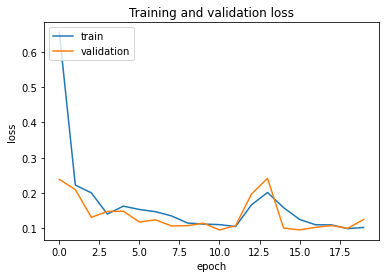

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 0.5238 - root_mean_squared_error: 0.6532 - val_loss: 0.2759 - val_root_mean_squared_error: 0.4282
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.3242 - root_mean_squared_error: 0.4934 - val_loss: 0.1848 - val_root_mean_squared_error: 0.3225
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 0.1714 - root_mean_squared_error: 0.2935 - val_loss: 0.1714 - val_root_mean_squared_error: 0.3141
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.2063 - root_mean_squared_error: 0.3565 - val_loss: 0.1698 - val_root_mean_squared_error: 0.2521
Epoch 5/20
22/22 [==============================] - 0s 6ms/step - loss: 0.2128 - root_mean_squared_error: 0.3576 - val_loss: 0.2224 - val_root_mean_squared_error: 0.3030
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 0.1896 - root_mean_squared_error: 0.3237 - val_loss: 0.1881 - val_root_mean_s

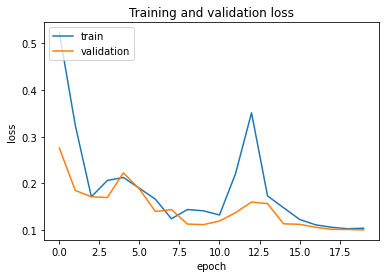

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 0.7473 - root_mean_squared_error: 0.8450 - val_loss: 0.4994 - val_root_mean_squared_error: 0.6766
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 0.4167 - root_mean_squared_error: 0.6035 - val_loss: 0.3412 - val_root_mean_squared_error: 0.5311
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 0.3045 - root_mean_squared_error: 0.4934 - val_loss: 0.2563 - val_root_mean_squared_error: 0.4408
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 0.2351 - root_mean_squared_error: 0.4147 - val_loss: 0.2022 - val_root_mean_squared_error: 0.3673
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1900 - root_mean_squared_error: 0.3465 - val_loss: 0.1709 - val_root_mean_squared_error: 0.3171
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1616 - root_mean_squared_error: 0.2999 - val_loss: 0.1492 - val_root_mean_s

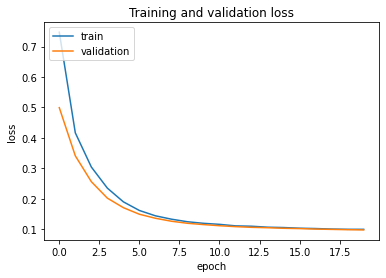

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 0.8487 - root_mean_squared_error: 0.9126 - val_loss: 0.5784 - val_root_mean_squared_error: 0.7429
Epoch 2/20
22/22 [==============================] - 0s 13ms/step - loss: 0.4982 - root_mean_squared_error: 0.6746 - val_loss: 0.4101 - val_root_mean_squared_error: 0.5977
Epoch 3/20
22/22 [==============================] - 1s 23ms/step - loss: 0.3634 - root_mean_squared_error: 0.5601 - val_loss: 0.3037 - val_root_mean_squared_error: 0.5013
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.2712 - root_mean_squared_error: 0.4641 - val_loss: 0.2351 - val_root_mean_squared_error: 0.4189
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 0.2212 - root_mean_squared_error: 0.3891 - val_loss: 0.1938 - val_root_mean_squared_error: 0.3503
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 0.1804 - root_mean_squared_error: 0.3368 - val_loss: 0.1677 - val_root_mean

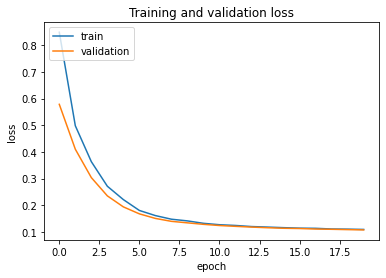

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 1.1797 - root_mean_squared_error: 1.0729 - val_loss: 1.1300 - val_root_mean_squared_error: 1.0499
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 1.0909 - root_mean_squared_error: 1.0313 - val_loss: 1.0497 - val_root_mean_squared_error: 1.0113
Epoch 3/20
22/22 [==============================] - 0s 7ms/step - loss: 1.0145 - root_mean_squared_error: 0.9939 - val_loss: 0.9777 - val_root_mean_squared_error: 0.9753
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.9460 - root_mean_squared_error: 0.9589 - val_loss: 0.9120 - val_root_mean_squared_error: 0.9409
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 0.8829 - root_mean_squared_error: 0.9251 - val_loss: 0.8544 - val_root_mean_squared_error: 0.9094
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 0.8287 - root_mean_squared_error: 0.8949 - val_loss: 0.8006 - val_root_mean_s

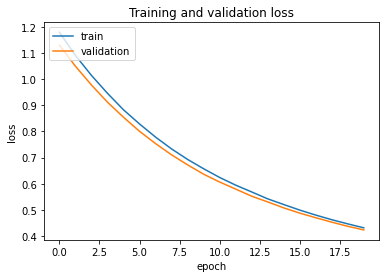

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 1.1187 - root_mean_squared_error: 1.0515 - val_loss: 1.0623 - val_root_mean_squared_error: 1.0246
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 1.0195 - root_mean_squared_error: 1.0037 - val_loss: 0.9756 - val_root_mean_squared_error: 0.9817
Epoch 3/20
22/22 [==============================] - 0s 8ms/step - loss: 0.9350 - root_mean_squared_error: 0.9607 - val_loss: 0.8943 - val_root_mean_squared_error: 0.9392
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 0.8625 - root_mean_squared_error: 0.9221 - val_loss: 0.8252 - val_root_mean_squared_error: 0.9013
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 0.7976 - root_mean_squared_error: 0.8856 - val_loss: 0.7663 - val_root_mean_squared_error: 0.8675
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 0.7414 - root_mean_squared_error: 0.8526 - val_loss: 0.7107 - val_root_mean_s

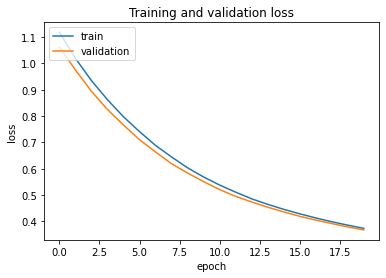

Epoch 1/20
22/22 [==============================] - 1s 11ms/step - loss: 1.0910 - root_mean_squared_error: 1.0321 - val_loss: 1.0854 - val_root_mean_squared_error: 1.0294
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - loss: 1.0812 - root_mean_squared_error: 1.0274 - val_loss: 1.0765 - val_root_mean_squared_error: 1.0251
Epoch 3/20
22/22 [==============================] - 0s 8ms/step - loss: 1.0722 - root_mean_squared_error: 1.0230 - val_loss: 1.0671 - val_root_mean_squared_error: 1.0205
Epoch 4/20
22/22 [==============================] - 0s 9ms/step - loss: 1.0627 - root_mean_squared_error: 1.0184 - val_loss: 1.0585 - val_root_mean_squared_error: 1.0163
Epoch 5/20
22/22 [==============================] - 0s 7ms/step - loss: 1.0542 - root_mean_squared_error: 1.0141 - val_loss: 1.0492 - val_root_mean_squared_error: 1.0117
Epoch 6/20
22/22 [==============================] - 0s 7ms/step - loss: 1.0453 - root_mean_squared_error: 1.0097 - val_loss: 1.0407 - val_root_mean_s

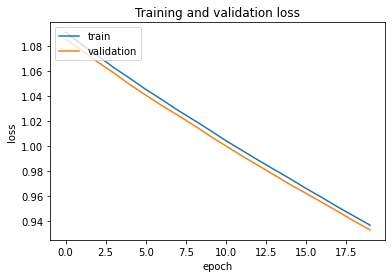

Epoch 1/20
22/22 [==============================] - 1s 12ms/step - loss: 1.2618 - root_mean_squared_error: 1.1159 - val_loss: 1.2553 - val_root_mean_squared_error: 1.1131
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 1.2504 - root_mean_squared_error: 1.1109 - val_loss: 1.2442 - val_root_mean_squared_error: 1.1081
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 1.2394 - root_mean_squared_error: 1.1060 - val_loss: 1.2331 - val_root_mean_squared_error: 1.1032
Epoch 4/20
22/22 [==============================] - 0s 6ms/step - loss: 1.2281 - root_mean_squared_error: 1.1010 - val_loss: 1.2221 - val_root_mean_squared_error: 1.0984
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 1.2175 - root_mean_squared_error: 1.0963 - val_loss: 1.2109 - val_root_mean_squared_error: 1.0933
Epoch 6/20
22/22 [==============================] - 0s 6ms/step - loss: 1.2063 - root_mean_squared_error: 1.0913 - val_loss: 1.2009 - val_root_mean_s

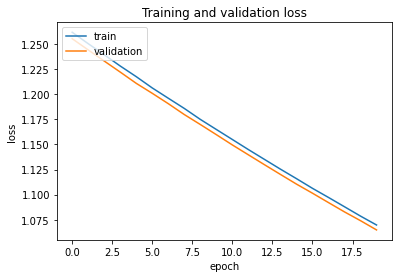

Epoch 1/30
22/22 [==============================] - 1s 27ms/step - loss: 54989.8320 - root_mean_squared_error: 234.4733 - val_loss: 6981.5903 - val_root_mean_squared_error: 83.5259
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 11253.0898 - root_mean_squared_error: 106.0568 - val_loss: 13293.5518 - val_root_mean_squared_error: 115.2669
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 24327.7988 - root_mean_squared_error: 155.9535 - val_loss: 11040.7666 - val_root_mean_squared_error: 105.0545
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 18939.8008 - root_mean_squared_error: 137.6027 - val_loss: 17958.9492 - val_root_mean_squared_error: 133.9878
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 9545.4463 - root_mean_squared_error: 97.6808 - val_loss: 2265.2349 - val_root_mean_squared_error: 47.5758
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 1630.6493 - root_mean_s

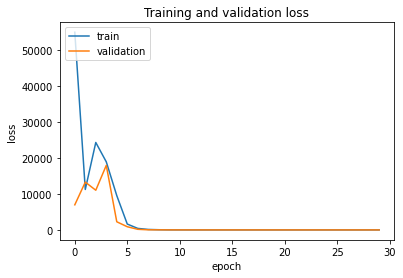

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 71474.3906 - root_mean_squared_error: 254.9033 - val_loss: 17534.9863 - val_root_mean_squared_error: 126.2255
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 36483.4258 - root_mean_squared_error: 182.1117 - val_loss: 10995.3320 - val_root_mean_squared_error: 99.9857
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 11933.6055 - root_mean_squared_error: 104.1588 - val_loss: 4153.0327 - val_root_mean_squared_error: 61.4224
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 5342.7422 - root_mean_squared_error: 69.6892 - val_loss: 3353.0750 - val_root_mean_squared_error: 55.2263
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 1257.3073 - root_mean_squared_error: 33.8076 - val_loss: 1195.7899 - val_root_mean_squared_error: 32.9603
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 1861.6667 - root_mean_square

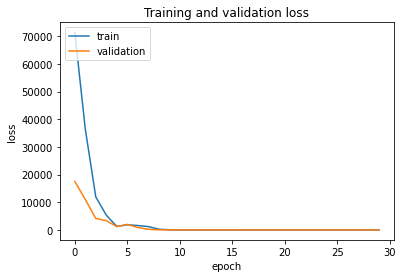

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 253.4041 - root_mean_squared_error: 15.8902 - val_loss: 286.6411 - val_root_mean_squared_error: 16.9044
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 77.2861 - root_mean_squared_error: 8.7659 - val_loss: 25.1769 - val_root_mean_squared_error: 4.9945
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 17.1230 - root_mean_squared_error: 4.1159 - val_loss: 4.6483 - val_root_mean_squared_error: 2.1341
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 3.4504 - root_mean_squared_error: 1.8359 - val_loss: 3.9899 - val_root_mean_squared_error: 1.9789
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 3.2460 - root_mean_squared_error: 1.7843 - val_loss: 1.4557 - val_root_mean_squared_error: 1.1889
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 2.6533 - root_mean_squared_error: 1.6129 - val_loss: 1.2587 - val_ro

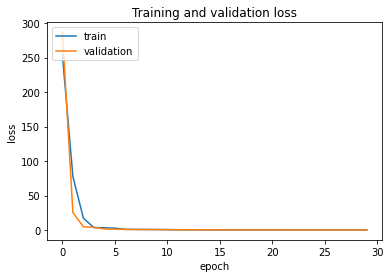

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 373.1512 - root_mean_squared_error: 18.4141 - val_loss: 404.0880 - val_root_mean_squared_error: 19.1277
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 139.6524 - root_mean_squared_error: 11.2623 - val_loss: 96.5921 - val_root_mean_squared_error: 9.3987
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 65.7136 - root_mean_squared_error: 7.7368 - val_loss: 89.6075 - val_root_mean_squared_error: 9.0437
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 42.3697 - root_mean_squared_error: 6.2046 - val_loss: 6.4374 - val_root_mean_squared_error: 2.4480
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 6.1421 - root_mean_squared_error: 2.3748 - val_loss: 3.6270 - val_root_mean_squared_error: 1.8401
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 2.8427 - root_mean_squared_error: 1.6246 - val_loss: 2.6556 - va

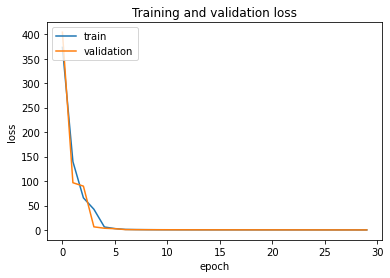

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 5.6139 - root_mean_squared_error: 2.3369 - val_loss: 3.7151 - val_root_mean_squared_error: 1.8972
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 2.8885 - root_mean_squared_error: 1.6659 - val_loss: 6.6128 - val_root_mean_squared_error: 2.5523
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 10.0769 - root_mean_squared_error: 3.1566 - val_loss: 3.4827 - val_root_mean_squared_error: 1.8306
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 3.8251 - root_mean_squared_error: 1.9238 - val_loss: 2.2088 - val_root_mean_squared_error: 1.4580
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 1.6277 - root_mean_squared_error: 1.2449 - val_loss: 1.3406 - val_root_mean_squared_error: 1.1242
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 1.0256 - root_mean_squared_error: 0.9687 - val_loss: 0.6366 - val_root_mean_

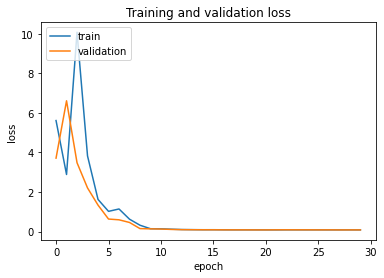

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 4.6750 - root_mean_squared_error: 2.0536 - val_loss: 4.0382 - val_root_mean_squared_error: 1.8952
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 1.7451 - root_mean_squared_error: 1.2477 - val_loss: 2.8958 - val_root_mean_squared_error: 1.6011
Epoch 3/30
22/22 [==============================] - 0s 6ms/step - loss: 3.3227 - root_mean_squared_error: 1.7302 - val_loss: 2.8170 - val_root_mean_squared_error: 1.5911
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 2.2888 - root_mean_squared_error: 1.4362 - val_loss: 1.0710 - val_root_mean_squared_error: 0.9524
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 1.4307 - root_mean_squared_error: 1.1236 - val_loss: 1.2746 - val_root_mean_squared_error: 1.0730
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 2.0695 - root_mean_squared_error: 1.3560 - val_loss: 1.3455 - val_root_mean_s

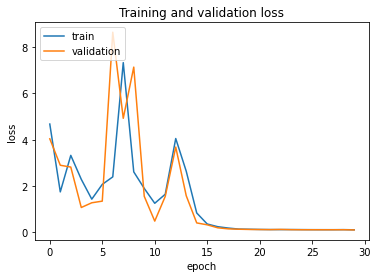

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 0.3916 - root_mean_squared_error: 0.5692 - val_loss: 0.2099 - val_root_mean_squared_error: 0.3509
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1487 - root_mean_squared_error: 0.2639 - val_loss: 0.1194 - val_root_mean_squared_error: 0.1940
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1372 - root_mean_squared_error: 0.2397 - val_loss: 0.1258 - val_root_mean_squared_error: 0.2269
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1261 - root_mean_squared_error: 0.2208 - val_loss: 0.1378 - val_root_mean_squared_error: 0.2377
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1361 - root_mean_squared_error: 0.2352 - val_loss: 0.1161 - val_root_mean_squared_error: 0.1904
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1473 - root_mean_squared_error: 0.2683 - val_loss: 0.1230 - val_root_mean_s

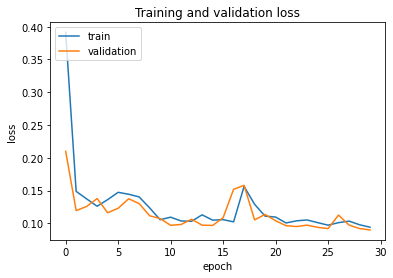

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 0.3401 - root_mean_squared_error: 0.5167 - val_loss: 0.1874 - val_root_mean_squared_error: 0.3288
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 0.2154 - root_mean_squared_error: 0.3599 - val_loss: 0.1638 - val_root_mean_squared_error: 0.2878
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1535 - root_mean_squared_error: 0.2722 - val_loss: 0.1193 - val_root_mean_squared_error: 0.1963
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1269 - root_mean_squared_error: 0.2132 - val_loss: 0.1373 - val_root_mean_squared_error: 0.2008
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1283 - root_mean_squared_error: 0.2088 - val_loss: 0.1290 - val_root_mean_squared_error: 0.2590
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1272 - root_mean_squared_error: 0.2164 - val_loss: 0.1115 - val_root_mean_s

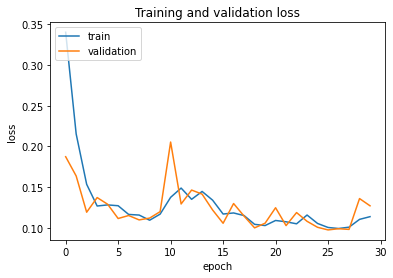

Epoch 1/30
22/22 [==============================] - 1s 11ms/step - loss: 0.5540 - root_mean_squared_error: 0.6927 - val_loss: 0.3768 - val_root_mean_squared_error: 0.5442
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 0.3179 - root_mean_squared_error: 0.4879 - val_loss: 0.2047 - val_root_mean_squared_error: 0.3626
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 0.2280 - root_mean_squared_error: 0.3905 - val_loss: 0.1724 - val_root_mean_squared_error: 0.3057
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1551 - root_mean_squared_error: 0.2708 - val_loss: 0.1322 - val_root_mean_squared_error: 0.2459
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 0.1355 - root_mean_squared_error: 0.2436 - val_loss: 0.1537 - val_root_mean_squared_error: 0.2580
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1477 - root_mean_squared_error: 0.2670 - val_loss: 0.1432 - val_root_mean_s

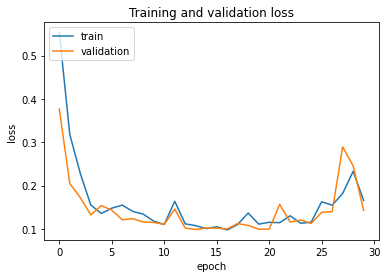

Epoch 1/30
22/22 [==============================] - 1s 25ms/step - loss: 0.5972 - root_mean_squared_error: 0.7039 - val_loss: 0.7318 - val_root_mean_squared_error: 0.8024
Epoch 2/30
22/22 [==============================] - 0s 6ms/step - loss: 0.4228 - root_mean_squared_error: 0.5752 - val_loss: 0.2204 - val_root_mean_squared_error: 0.3522
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 0.3775 - root_mean_squared_error: 0.5362 - val_loss: 0.2373 - val_root_mean_squared_error: 0.4021
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.3026 - root_mean_squared_error: 0.4490 - val_loss: 0.1951 - val_root_mean_squared_error: 0.3705
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1891 - root_mean_squared_error: 0.3346 - val_loss: 0.1837 - val_root_mean_squared_error: 0.3325
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1391 - root_mean_squared_error: 0.2371 - val_loss: 0.1577 - val_root_mean_s

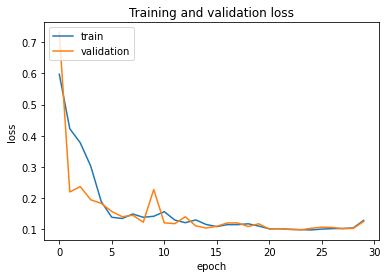

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 0.7935 - root_mean_squared_error: 0.8712 - val_loss: 0.5614 - val_root_mean_squared_error: 0.7207
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 0.4947 - root_mean_squared_error: 0.6649 - val_loss: 0.4099 - val_root_mean_squared_error: 0.5917
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 0.3701 - root_mean_squared_error: 0.5574 - val_loss: 0.3208 - val_root_mean_squared_error: 0.5119
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.2997 - root_mean_squared_error: 0.4893 - val_loss: 0.2596 - val_root_mean_squared_error: 0.4431
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 0.2403 - root_mean_squared_error: 0.4184 - val_loss: 0.2136 - val_root_mean_squared_error: 0.3821
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 0.2028 - root_mean_squared_error: 0.3634 - val_loss: 0.1838 - val_root_mean_s

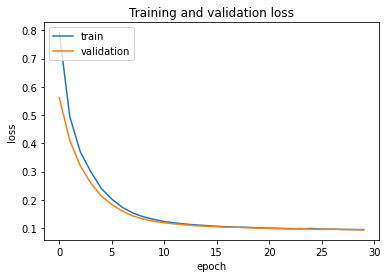

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 0.8253 - root_mean_squared_error: 0.8977 - val_loss: 0.5644 - val_root_mean_squared_error: 0.7311
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 0.4788 - root_mean_squared_error: 0.6623 - val_loss: 0.4132 - val_root_mean_squared_error: 0.6012
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 0.3706 - root_mean_squared_error: 0.5636 - val_loss: 0.3177 - val_root_mean_squared_error: 0.5140
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 0.2904 - root_mean_squared_error: 0.4842 - val_loss: 0.2547 - val_root_mean_squared_error: 0.4448
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 0.2390 - root_mean_squared_error: 0.4212 - val_loss: 0.2115 - val_root_mean_squared_error: 0.3806
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.2007 - root_mean_squared_error: 0.3656 - val_loss: 0.1831 - val_root_mean_s

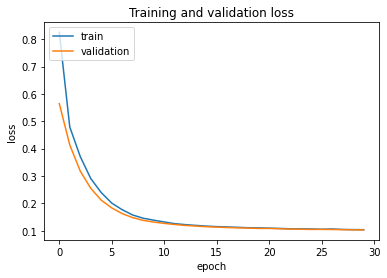

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 1.1816 - root_mean_squared_error: 1.0747 - val_loss: 1.1308 - val_root_mean_squared_error: 1.0511
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 1.0933 - root_mean_squared_error: 1.0334 - val_loss: 1.0466 - val_root_mean_squared_error: 1.0107
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 1.0124 - root_mean_squared_error: 0.9938 - val_loss: 0.9715 - val_root_mean_squared_error: 0.9731
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.9394 - root_mean_squared_error: 0.9564 - val_loss: 0.9072 - val_root_mean_squared_error: 0.9393
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 0.8788 - root_mean_squared_error: 0.9237 - val_loss: 0.8436 - val_root_mean_squared_error: 0.9041
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 0.8196 - root_mean_squared_error: 0.8904 - val_loss: 0.7940 - val_root_mean_s

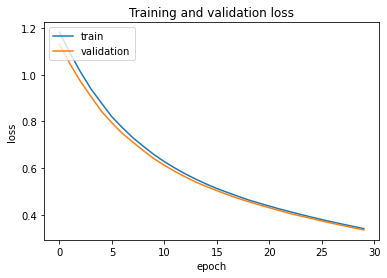

Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 1.1294 - root_mean_squared_error: 1.0546 - val_loss: 1.0810 - val_root_mean_squared_error: 1.0317
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 1.0432 - root_mean_squared_error: 1.0135 - val_loss: 1.0002 - val_root_mean_squared_error: 0.9923
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 0.9641 - root_mean_squared_error: 0.9740 - val_loss: 0.9277 - val_root_mean_squared_error: 0.9552
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.8964 - root_mean_squared_error: 0.9386 - val_loss: 0.8582 - val_root_mean_squared_error: 0.9180
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 0.8317 - root_mean_squared_error: 0.9034 - val_loss: 0.7999 - val_root_mean_squared_error: 0.8854
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7771 - root_mean_squared_error: 0.8722 - val_loss: 0.7487 - val_root_mean_s

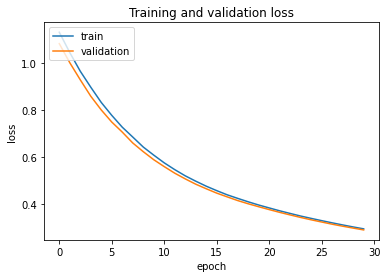

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 1.1156 - root_mean_squared_error: 1.0425 - val_loss: 1.1102 - val_root_mean_squared_error: 1.0399
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 1.1064 - root_mean_squared_error: 1.0381 - val_loss: 1.1012 - val_root_mean_squared_error: 1.0356
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 1.0973 - root_mean_squared_error: 1.0337 - val_loss: 1.0921 - val_root_mean_squared_error: 1.0312
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 1.0879 - root_mean_squared_error: 1.0292 - val_loss: 1.0835 - val_root_mean_squared_error: 1.0271
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 1.0790 - root_mean_squared_error: 1.0249 - val_loss: 1.0742 - val_root_mean_squared_error: 1.0226
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 1.0699 - root_mean_squared_error: 1.0205 - val_loss: 1.0652 - val_root_mean_s

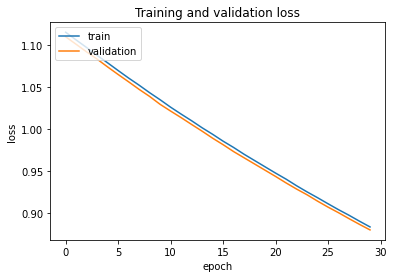

Epoch 1/30
22/22 [==============================] - 1s 13ms/step - loss: 1.1692 - root_mean_squared_error: 1.0756 - val_loss: 1.1642 - val_root_mean_squared_error: 1.0733
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 1.1601 - root_mean_squared_error: 1.0714 - val_loss: 1.1553 - val_root_mean_squared_error: 1.0692
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 1.1515 - root_mean_squared_error: 1.0674 - val_loss: 1.1467 - val_root_mean_squared_error: 1.0652
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 1.1429 - root_mean_squared_error: 1.0635 - val_loss: 1.1382 - val_root_mean_squared_error: 1.0612
Epoch 5/30
22/22 [==============================] - 0s 7ms/step - loss: 1.1342 - root_mean_squared_error: 1.0594 - val_loss: 1.1298 - val_root_mean_squared_error: 1.0573
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 1.1260 - root_mean_squared_error: 1.0555 - val_loss: 1.1210 - val_root_mean_s

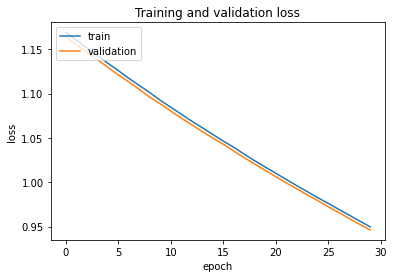

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 56981.9102 - root_mean_squared_error: 238.6803 - val_loss: 148914.3594 - val_root_mean_squared_error: 385.8658
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 31228.5605 - root_mean_squared_error: 176.6860 - val_loss: 27488.3477 - val_root_mean_squared_error: 165.7677
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 11834.5186 - root_mean_squared_error: 108.7662 - val_loss: 14547.2002 - val_root_mean_squared_error: 120.5908
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 8002.7197 - root_mean_squared_error: 89.4383 - val_loss: 1084.4036 - val_root_mean_squared_error: 32.9106
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 2076.9712 - root_mean_squared_error: 45.5559 - val_loss: 523.6864 - val_root_mean_squared_error: 22.8665
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 497.0718 - root_mean_squa

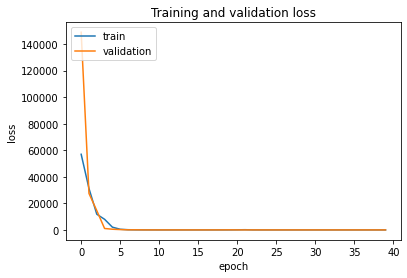

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 52722.4023 - root_mean_squared_error: 218.9180 - val_loss: 37821.7344 - val_root_mean_squared_error: 185.4537
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 30849.1953 - root_mean_squared_error: 167.4727 - val_loss: 12361.2119 - val_root_mean_squared_error: 106.0075
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 27204.0156 - root_mean_squared_error: 157.2575 - val_loss: 25769.7969 - val_root_mean_squared_error: 153.0958
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 7770.2339 - root_mean_squared_error: 84.0593 - val_loss: 2712.9885 - val_root_mean_squared_error: 49.6348
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 1895.5570 - root_mean_squared_error: 41.5031 - val_loss: 725.4922 - val_root_mean_squared_error: 25.6675
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 730.1540 - root_mean_squar

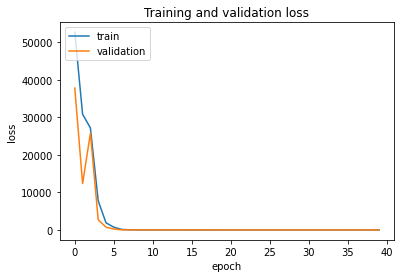

Epoch 1/40
22/22 [==============================] - 1s 27ms/step - loss: 479.0370 - root_mean_squared_error: 21.8565 - val_loss: 495.3712 - val_root_mean_squared_error: 22.2260
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 229.3708 - root_mean_squared_error: 15.1201 - val_loss: 334.7220 - val_root_mean_squared_error: 18.2761
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 121.6393 - root_mean_squared_error: 11.0016 - val_loss: 321.2445 - val_root_mean_squared_error: 17.8958
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 68.4960 - root_mean_squared_error: 8.2464 - val_loss: 26.6049 - val_root_mean_squared_error: 5.1312
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 16.5482 - root_mean_squared_error: 4.0435 - val_loss: 9.0572 - val_root_mean_squared_error: 2.9876
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 8.3973 - root_mean_squared_error: 2.8757 - val_loss: 2.9

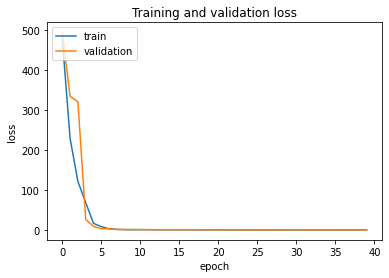

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 636.1187 - root_mean_squared_error: 24.0422 - val_loss: 453.6990 - val_root_mean_squared_error: 20.2887
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 343.9828 - root_mean_squared_error: 17.6814 - val_loss: 132.3675 - val_root_mean_squared_error: 10.9391
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 65.6428 - root_mean_squared_error: 7.7167 - val_loss: 19.4945 - val_root_mean_squared_error: 4.2175
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 18.7951 - root_mean_squared_error: 4.1260 - val_loss: 13.5264 - val_root_mean_squared_error: 3.4864
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 10.6827 - root_mean_squared_error: 3.1171 - val_loss: 10.0858 - val_root_mean_squared_error: 3.0465
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 5.2565 - root_mean_squared_error: 2.1755 - val_loss: 3.1724

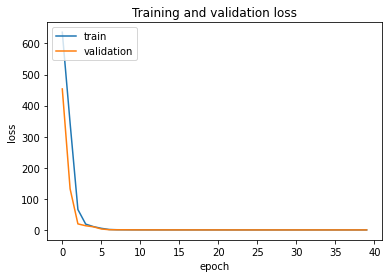

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 11.2931 - root_mean_squared_error: 3.3293 - val_loss: 8.0065 - val_root_mean_squared_error: 2.8021
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 8.8567 - root_mean_squared_error: 2.9511 - val_loss: 9.1604 - val_root_mean_squared_error: 3.0037
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 7.3723 - root_mean_squared_error: 2.6894 - val_loss: 6.6034 - val_root_mean_squared_error: 2.5330
Epoch 4/40
22/22 [==============================] - 0s 7ms/step - loss: 8.9278 - root_mean_squared_error: 2.9660 - val_loss: 7.7246 - val_root_mean_squared_error: 2.7594
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 8.9048 - root_mean_squared_error: 2.9598 - val_loss: 8.0249 - val_root_mean_squared_error: 2.8066
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 6.9544 - root_mean_squared_error: 2.6142 - val_loss: 6.1400 - val_root_mean_

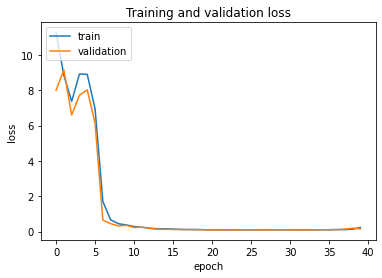

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 14.7328 - root_mean_squared_error: 3.6683 - val_loss: 5.6596 - val_root_mean_squared_error: 2.2894
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 5.4270 - root_mean_squared_error: 2.2208 - val_loss: 1.1273 - val_root_mean_squared_error: 0.9927
Epoch 3/40
22/22 [==============================] - 0s 6ms/step - loss: 1.1109 - root_mean_squared_error: 0.9851 - val_loss: 0.8829 - val_root_mean_squared_error: 0.8996
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 1.2834 - root_mean_squared_error: 1.0715 - val_loss: 1.4829 - val_root_mean_squared_error: 1.1055
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 0.9495 - root_mean_squared_error: 0.9057 - val_loss: 0.4667 - val_root_mean_squared_error: 0.6208
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.4066 - root_mean_squared_error: 0.5689 - val_loss: 0.2187 - val_root_mean_

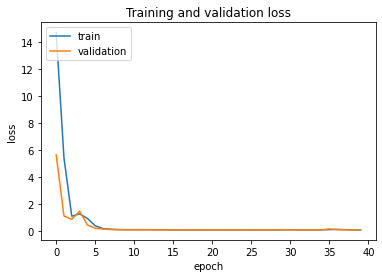

Epoch 1/40
22/22 [==============================] - 1s 13ms/step - loss: 0.4561 - root_mean_squared_error: 0.6243 - val_loss: 0.1581 - val_root_mean_squared_error: 0.2875
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1654 - root_mean_squared_error: 0.2920 - val_loss: 0.1382 - val_root_mean_squared_error: 0.2601
Epoch 3/40
22/22 [==============================] - 0s 9ms/step - loss: 0.1421 - root_mean_squared_error: 0.2547 - val_loss: 0.1202 - val_root_mean_squared_error: 0.1889
Epoch 4/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1164 - root_mean_squared_error: 0.1876 - val_loss: 0.1280 - val_root_mean_squared_error: 0.2409
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1166 - root_mean_squared_error: 0.1964 - val_loss: 0.1092 - val_root_mean_squared_error: 0.1716
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1132 - root_mean_squared_error: 0.1887 - val_loss: 0.1046 - val_root_mean_s

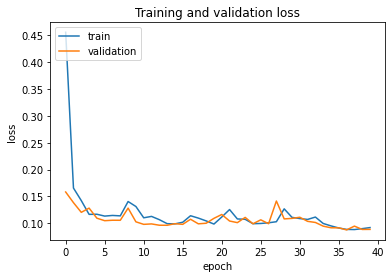

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 0.3941 - root_mean_squared_error: 0.5728 - val_loss: 0.2355 - val_root_mean_squared_error: 0.3596
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1800 - root_mean_squared_error: 0.3025 - val_loss: 0.1614 - val_root_mean_squared_error: 0.2949
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1394 - root_mean_squared_error: 0.2438 - val_loss: 0.1318 - val_root_mean_squared_error: 0.1981
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1296 - root_mean_squared_error: 0.2201 - val_loss: 0.1173 - val_root_mean_squared_error: 0.1987
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1209 - root_mean_squared_error: 0.1954 - val_loss: 0.1193 - val_root_mean_squared_error: 0.1656
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1203 - root_mean_squared_error: 0.2024 - val_loss: 0.1110 - val_root_mean_s

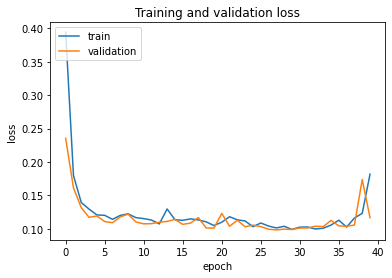

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 0.7372 - root_mean_squared_error: 0.8079 - val_loss: 0.3888 - val_root_mean_squared_error: 0.5684
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 0.3070 - root_mean_squared_error: 0.4875 - val_loss: 0.3650 - val_root_mean_squared_error: 0.5223
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 0.3417 - root_mean_squared_error: 0.5119 - val_loss: 0.2573 - val_root_mean_squared_error: 0.4247
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 0.2454 - root_mean_squared_error: 0.4116 - val_loss: 0.2289 - val_root_mean_squared_error: 0.3881
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1745 - root_mean_squared_error: 0.3092 - val_loss: 0.1304 - val_root_mean_squared_error: 0.2257
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1345 - root_mean_squared_error: 0.2383 - val_loss: 0.1213 - val_root_mean_s

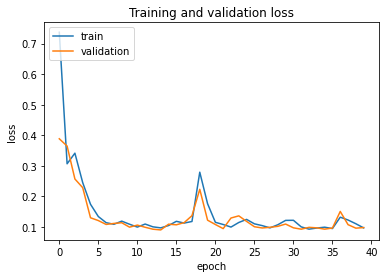

Epoch 1/40
22/22 [==============================] - 1s 13ms/step - loss: 0.6031 - root_mean_squared_error: 0.7126 - val_loss: 0.5181 - val_root_mean_squared_error: 0.6050
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 0.2712 - root_mean_squared_error: 0.4322 - val_loss: 0.2024 - val_root_mean_squared_error: 0.3178
Epoch 3/40
22/22 [==============================] - 0s 7ms/step - loss: 0.2642 - root_mean_squared_error: 0.4130 - val_loss: 0.2519 - val_root_mean_squared_error: 0.4398
Epoch 4/40
22/22 [==============================] - 0s 7ms/step - loss: 0.3056 - root_mean_squared_error: 0.4713 - val_loss: 0.2309 - val_root_mean_squared_error: 0.3723
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1975 - root_mean_squared_error: 0.3259 - val_loss: 0.1957 - val_root_mean_squared_error: 0.3798
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1975 - root_mean_squared_error: 0.3522 - val_loss: 0.1452 - val_root_mean_s

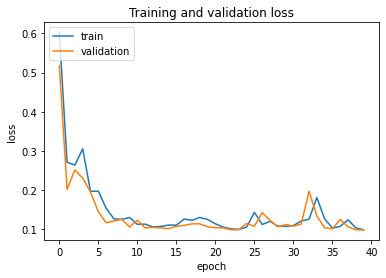

Epoch 1/40
22/22 [==============================] - 1s 11ms/step - loss: 0.8193 - root_mean_squared_error: 0.8875 - val_loss: 0.5688 - val_root_mean_squared_error: 0.7246
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 0.4913 - root_mean_squared_error: 0.6628 - val_loss: 0.4087 - val_root_mean_squared_error: 0.5933
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 0.3636 - root_mean_squared_error: 0.5530 - val_loss: 0.3043 - val_root_mean_squared_error: 0.4943
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 0.2755 - root_mean_squared_error: 0.4617 - val_loss: 0.2333 - val_root_mean_squared_error: 0.4099
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 0.2161 - root_mean_squared_error: 0.3872 - val_loss: 0.1928 - val_root_mean_squared_error: 0.3526
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.1854 - root_mean_squared_error: 0.3356 - val_loss: 0.1647 - val_root_mean_s

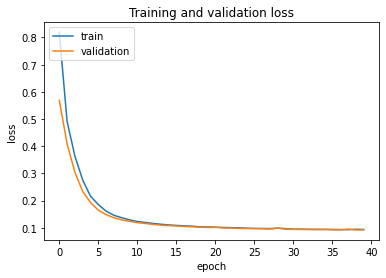

Epoch 1/40
22/22 [==============================] - 1s 26ms/step - loss: 0.8908 - root_mean_squared_error: 0.9340 - val_loss: 0.5599 - val_root_mean_squared_error: 0.7310
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 0.4516 - root_mean_squared_error: 0.6445 - val_loss: 0.3694 - val_root_mean_squared_error: 0.5661
Epoch 3/40
22/22 [==============================] - 0s 9ms/step - loss: 0.3322 - root_mean_squared_error: 0.5288 - val_loss: 0.2888 - val_root_mean_squared_error: 0.4807
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 0.2656 - root_mean_squared_error: 0.4516 - val_loss: 0.2339 - val_root_mean_squared_error: 0.4145
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 0.2192 - root_mean_squared_error: 0.4005 - val_loss: 0.1990 - val_root_mean_squared_error: 0.3684
Epoch 6/40
22/22 [==============================] - 0s 7ms/step - loss: 0.1871 - root_mean_squared_error: 0.3445 - val_loss: 0.1722 - val_root_mean_s

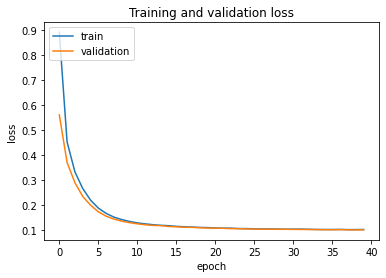

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 1.1236 - root_mean_squared_error: 1.0443 - val_loss: 1.0741 - val_root_mean_squared_error: 1.0207
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 1.0331 - root_mean_squared_error: 1.0005 - val_loss: 0.9876 - val_root_mean_squared_error: 0.9776
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 0.9539 - root_mean_squared_error: 0.9602 - val_loss: 0.9152 - val_root_mean_squared_error: 0.9399
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 0.8867 - root_mean_squared_error: 0.9246 - val_loss: 0.8510 - val_root_mean_squared_error: 0.9049
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 0.8257 - root_mean_squared_error: 0.8906 - val_loss: 0.7973 - val_root_mean_squared_error: 0.8744
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.7738 - root_mean_squared_error: 0.8605 - val_loss: 0.7473 - val_root_mean_s

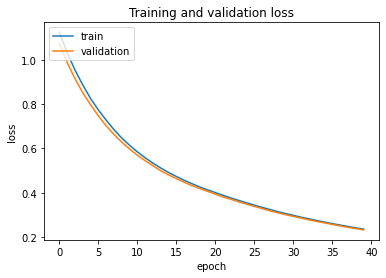

Epoch 1/40
22/22 [==============================] - 1s 12ms/step - loss: 1.1400 - root_mean_squared_error: 1.0563 - val_loss: 1.0920 - val_root_mean_squared_error: 1.0339
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 1.0547 - root_mean_squared_error: 1.0160 - val_loss: 1.0163 - val_root_mean_squared_error: 0.9973
Epoch 3/40
22/22 [==============================] - 0s 8ms/step - loss: 0.9820 - root_mean_squared_error: 0.9802 - val_loss: 0.9455 - val_root_mean_squared_error: 0.9616
Epoch 4/40
22/22 [==============================] - 0s 7ms/step - loss: 0.9159 - root_mean_squared_error: 0.9462 - val_loss: 0.8824 - val_root_mean_squared_error: 0.9285
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 0.8562 - root_mean_squared_error: 0.9143 - val_loss: 0.8273 - val_root_mean_squared_error: 0.8984
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.8042 - root_mean_squared_error: 0.8854 - val_loss: 0.7771 - val_root_mean_s

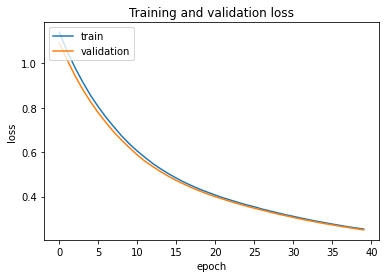

Epoch 1/40
22/22 [==============================] - 1s 13ms/step - loss: 0.9792 - root_mean_squared_error: 0.9772 - val_loss: 0.9752 - val_root_mean_squared_error: 0.9751
Epoch 2/40
22/22 [==============================] - 0s 8ms/step - loss: 0.9718 - root_mean_squared_error: 0.9734 - val_loss: 0.9681 - val_root_mean_squared_error: 0.9715
Epoch 3/40
22/22 [==============================] - 0s 9ms/step - loss: 0.9647 - root_mean_squared_error: 0.9697 - val_loss: 0.9607 - val_root_mean_squared_error: 0.9676
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 0.9574 - root_mean_squared_error: 0.9659 - val_loss: 0.9537 - val_root_mean_squared_error: 0.9640
Epoch 5/40
22/22 [==============================] - 0s 7ms/step - loss: 0.9505 - root_mean_squared_error: 0.9623 - val_loss: 0.9468 - val_root_mean_squared_error: 0.9604
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 0.9438 - root_mean_squared_error: 0.9588 - val_loss: 0.9402 - val_root_mean_s

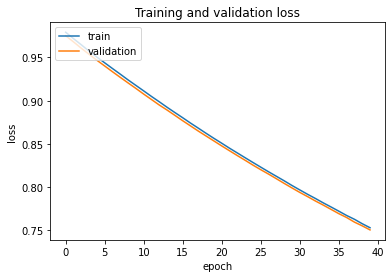

Epoch 1/40
22/22 [==============================] - 1s 13ms/step - loss: 1.2526 - root_mean_squared_error: 1.1115 - val_loss: 1.2465 - val_root_mean_squared_error: 1.1088
Epoch 2/40
22/22 [==============================] - 0s 7ms/step - loss: 1.2424 - root_mean_squared_error: 1.1069 - val_loss: 1.2368 - val_root_mean_squared_error: 1.1045
Epoch 3/40
22/22 [==============================] - 0s 9ms/step - loss: 1.2326 - root_mean_squared_error: 1.1026 - val_loss: 1.2270 - val_root_mean_squared_error: 1.1001
Epoch 4/40
22/22 [==============================] - 0s 8ms/step - loss: 1.2228 - root_mean_squared_error: 1.0982 - val_loss: 1.2174 - val_root_mean_squared_error: 1.0958
Epoch 5/40
22/22 [==============================] - 0s 8ms/step - loss: 1.2130 - root_mean_squared_error: 1.0939 - val_loss: 1.2079 - val_root_mean_squared_error: 1.0916
Epoch 6/40
22/22 [==============================] - 0s 8ms/step - loss: 1.2036 - root_mean_squared_error: 1.0896 - val_loss: 1.1987 - val_root_mean_s

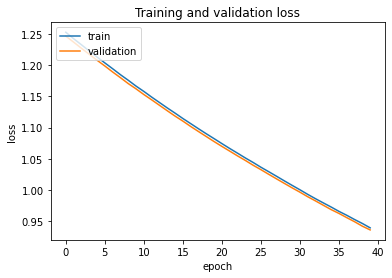

In [56]:
#with regularization

activation_functions = ["sigmoid","relu"]
epochs=[10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
regularizations=["L1","L2"]
for i in activation_functions:
  for j in epochs:
    for k in learning_rate:
      for l in regularizations:
        model_one_hidden_layer(i,j,k,l)


In [ ]:
#without regularization

activation_functions = ["sigmoid","relu"]
epochs=[10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
regularizations=["No"]

for i in activation_functions:
  for j in epochs:
    for k in learning_rate:
      for l in regularizations:
        model_one_hidden_layer(i,j,k,l)


**TWO HIDDEN LAYERS**

In [ ]:
rmse_list=[1000]

In [ ]:
def model_two_hidden_layer(fn,ep,lr,reg):
  model2=Sequential()
  if reg=="L1":
    model2.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model2.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model2.add(tf.keras.layers.Dense(64,activation=fn,name="hiddenLayer2"))
    model2.add(tf.keras.layers.Dense(10,activation='linear',activity_regularizer=tf.keras.regularizers.L1(0.01),name="outputLayer"))
  elif(reg=="L2"):
    model2.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model2.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model2.add(tf.keras.layers.Dense(64,activation=fn,name="hiddenLayer2"))
    model2.add(tf.keras.layers.Dense(10,activation='linear',activity_regularizer=tf.keras.regularizers.L2(0.01),name="outputLayer"))    
  elif(reg=="No"):
    model2.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model2.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model2.add(tf.keras.layers.Dense(64,activation=fn,name="hiddenLayer2"))
    model2.add(tf.keras.layers.Dense(10,activation='linear',name="outputLayer"))    

  opt=tf.keras.optimizers.Adam(learning_rate=lr)
  model2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
  history_m2=model2.fit(X_train,y_train,validation_data=(X_train,y_train), epochs=ep, batch_size=10)
  #print('Result: ',model2.evaluate(X_test,y_test))
  rmse=model2.evaluate(X_test,y_test,verbose=False)[1]
  if rmse<=min(rmse_list):
    print("for hyperparameters \n ","Activation:",fn,"Regularization :",reg,"Learning rate :",lr ,"and no of epochs :",ep)
    print("rmse score is :",rmse)
    print("---------------------------------------------------------------------")
  rmse_list.append(rmse)
  
  loss=history_m2.history['loss']
  val_loss=history_m2.history['val_loss']
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Training and validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

In [ ]:
#with regularization

activation_functions = ["sigmoid","relu"]
epochs=[10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
regularizations=["L1","L2"]

for i in activation_functions:
  for j in epochs:
    for k in learning_rate:
      for l in regularizations:
        model_two_hidden_layer(i,j,k,l)


In [ ]:
#without regularization

activation_functions = ["sigmoid","relu"]
epochs=[10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
regularizations=["No"]

for i in activation_functions:
  for j in epochs:
    for k in learning_rate:
      for l in regularizations:
        model_two_hidden_layer(i,j,k,l)


**THREE HIDDEN LAYERS**

In [ ]:
rmse_list=[1000]

In [ ]:
def model_three_hidden_layer(fn,ep,lr,reg):
  model3=Sequential()
  if reg=="L1":
    model3.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model3.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model3.add(tf.keras.layers.Dense(64,activation=fn,name="hiddenLayer2"))
    model3.add(tf.keras.layers.Dense(10,activation='linear',activity_regularizer=tf.keras.regularizers.L1(0.01),name="outputLayer"))
  elif(reg=="L2"):
    model3.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model3.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model3.add(tf.keras.layers.Dense(64,activation=fn,name="hiddenLayer2"))
    model3.add(tf.keras.layers.Dense(10,activation='linear',activity_regularizer=tf.keras.regularizers.L2(0.01),name="outputLayer"))    
  elif(reg=="No"):
    model3.add(tf.keras.layers.InputLayer(input_shape=14,name="InputLayer")) 
    model3.add(tf.keras.layers.Dense(128,activation=fn,name="hiddenLayer1"))
    model3.add(tf.keras.layers.Dense(64,activation=fn,name="hiddenLayer2"))
    model3.add(tf.keras.layers.Dense(10,activation='linear',name="outputLayer"))    

  opt=tf.keras.optimizers.Adam(learning_rate=lr)
  model3.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])
  history_m3=model3.fit(X_train,y_train,validation_data=(X_train,y_train), epochs=ep, batch_size=10)
  rmse=model3.evaluate(X_test,y_test,verbose=False)[1]
  if rmse<=min(rmse_list):
    print("for hyperparameters \n ","Activation:",fn,"Regularization :",reg,"Learning rate :",lr ,"and no of epochs :",ep)
    print("rmse score is :",rmse)
    print("---------------------------------------------------------------------")
  rmse_list.append(rmse)
  
  loss=history_m3.history['loss']
  val_loss=history_m3.history['val_loss']
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Training and validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

In [ ]:
#with regularization

activation_functions = ["sigmoid","relu"]
epochs=[10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
regularizations=["L1","L2"]

for i in activation_functions:
  for j in epochs:
    for k in learning_rate:
      for l in regularizations:
        model_three_hidden_layer(i,j,k,l)


In [ ]:
#without regularization

activation_functions = ["sigmoid","relu"]
epochs=[10,20,30,40]
learning_rate=[1, 0.3, 0.1, 0.01,0.03,0.001,0.0001,0.00001]
regularizations=["No"]

for i in activation_functions:
  for j in epochs:
    for k in learning_rate:
      for l in regularizations:
        model_three_hidden_layer(i,j,k,l)
